In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

plt.rcdefaults()

In [2]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [3]:
omega_index = 1 # while we debug, we confine our attention to just one value
onh2 = spectra.omegas_nu[omega_index]
onh2_str = spectra.omnu_strings[omega_index]

In [4]:
k_massless_list, z_massless_list, p_massless_list, s12_massless_list, \
    k_massive_list, z_massive_list, p_massive_list, s12_massive_list = \
    spectra.boltzmann_battery(onh2, skips=[8])

In [5]:
# Axe the 0.01 value since Ariel has not tested that one in the shared results
spectra.omegas_nu = spectra.omegas_nu[:(len(spectra.omegas_nu) - 1)]
spectra.omnu_strings = spectra.omnu_strings[:(len(spectra.omnu_strings) - 1)]
spectra.define_powernu()
spectra.define_powernu2()
spectra.define_powernu3()

In [6]:
# It's a waste of time to consider all of the omegas and snapshots, so we're
# making heavy use of skips.
spec_sims = spectra.better_battery(spectra.omegas_nu, spectra.omnu_strings,
    skips_omega = [0, 3], skips_model=[8], skips_snapshot=[1, 2, 3],
    h_units=False)

0
1
2


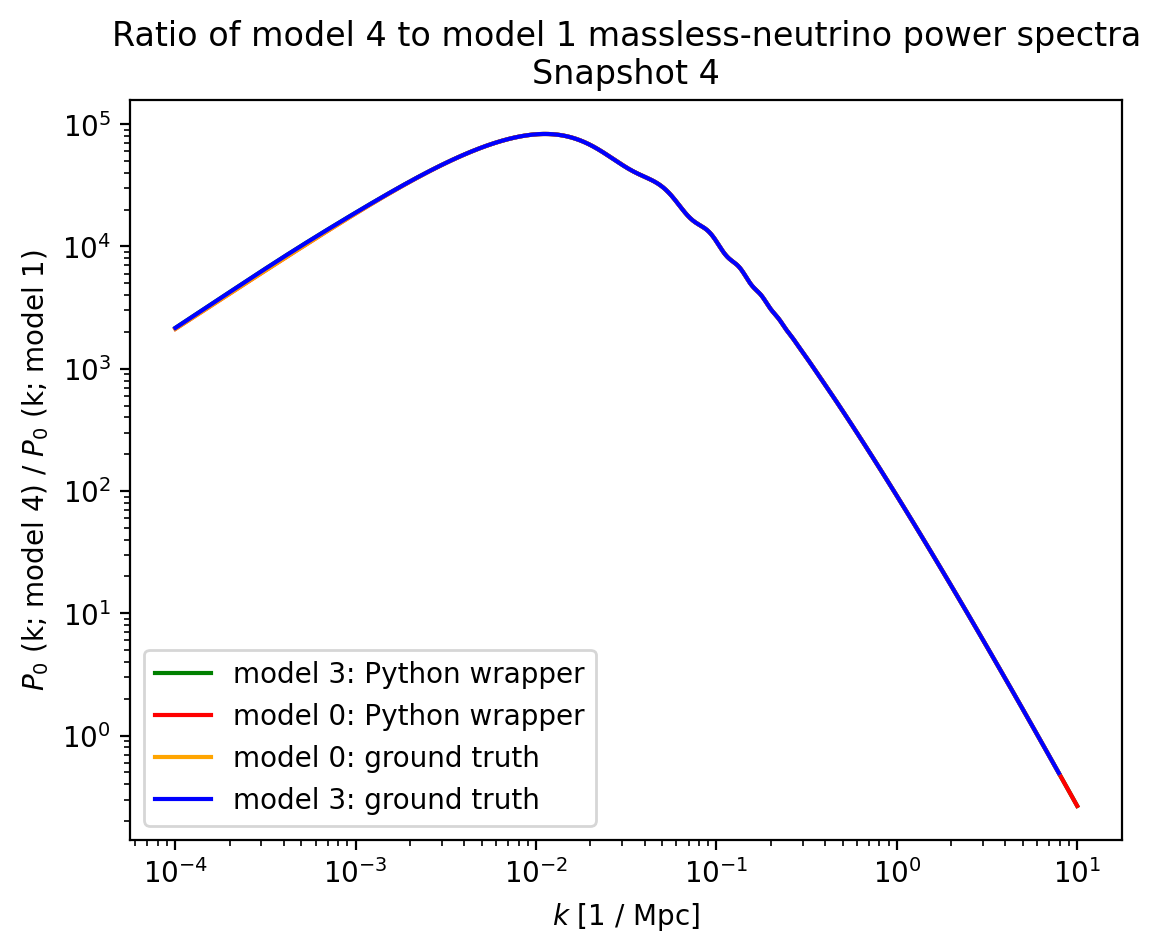

In [7]:
modeli = 3
snapi = 4

sim = spec_sims[onh2_str][0][snapi]
baseline_h = spectra.cosm.loc[0]["h"]
baseline_k = sim["k"]
#baseline_p = p_massless_list[0][z_index] / baseline_h ** 3
baseline_p = sim["P_no"]

sim = spec_sims[onh2_str][modeli][snapi]
this_h = spectra.cosm.loc[modeli]["h"]
this_k = sim["k"]
#this_p = p_massless_list[modeli][z_index] / this_h ** 3
this_p = sim["P_no"]

truncated_k, truncated_p, aligned_p = \
    spectra.truncator(baseline_k, baseline_p, this_k,
    this_p, interpolation=this_h != baseline_h)

true_baseline = spectra.powernu3[onh2_str][0][snapi]
baseline_k_true = true_baseline["k"]
baseline_p_true = true_baseline["P_no"]

true_this = spectra.powernu3[onh2_str][modeli][snapi]
this_k_true = true_this["k"]
this_p_true = true_this["P_no"]

plt.plot(truncated_k, aligned_p, c="green", label="model 3: Python wrapper")
plt.plot(truncated_k, truncated_p, c="red", label="model 0: Python wrapper")
plt.plot(baseline_k_true, baseline_p_true, c="orange",
         label="model 0: ground truth")
plt.plot(this_k_true, this_p_true, c="blue", label="model 3: ground truth")
plt.title("Model " + str(modeli) + " and model 0 massless-neutrino" + \
          " power spectra\nSnapshot " + str(snapi))
plt.ylabel(r"$P_0$ (k; model " + str(modeli + 1) + ") / $P_0$ (k; model 1)")
plt.title("Ratio of model " + str(modeli + 1) + " to model 1" + \
          " massless-neutrino power spectra\nSnapshot " + str(snapi))
plt.xlabel(r"$k$ [1 / Mpc]")
plt.xscale("log")
plt.yscale("log")
plt.legend()

del modeli, snapi, sim

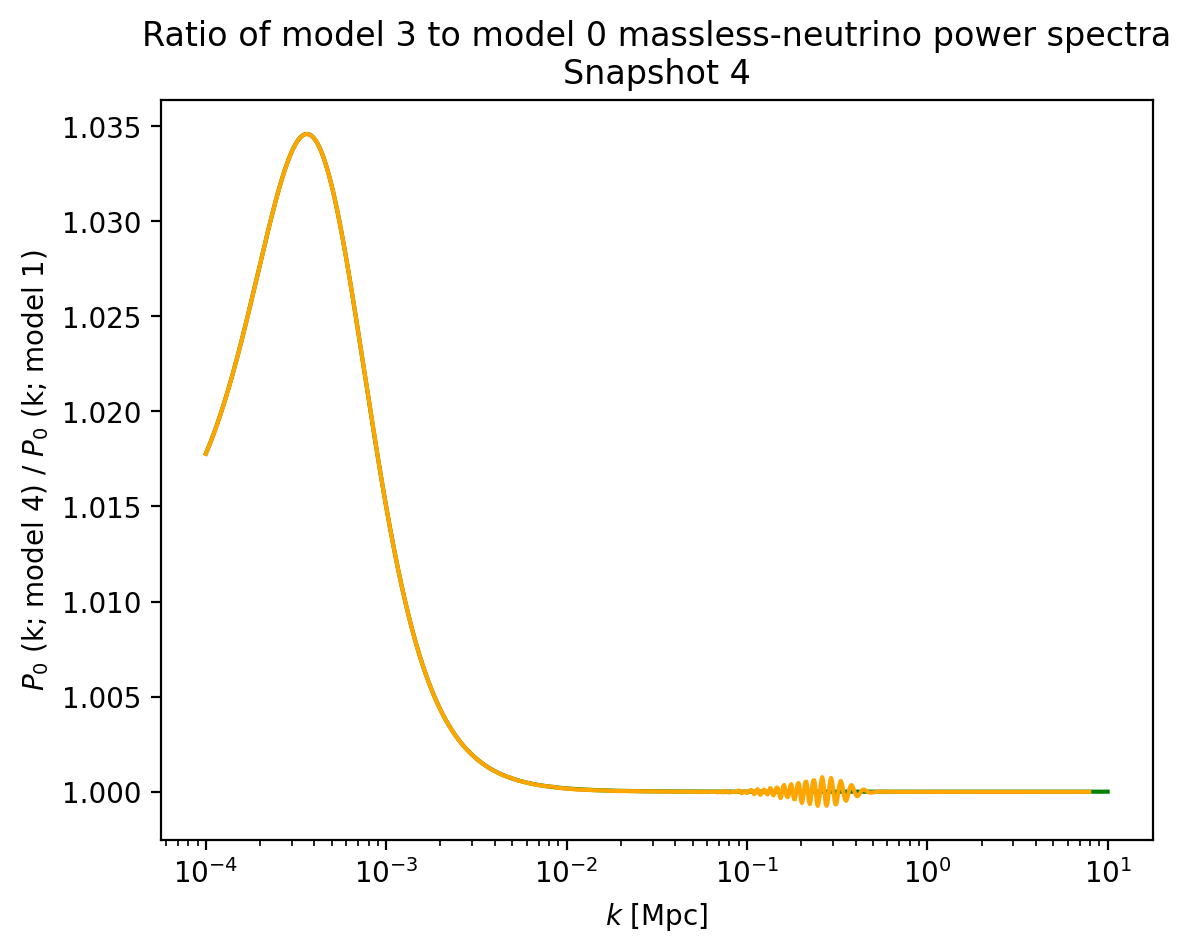

In [8]:
modeli = 3
snapi = 4

sim = spec_sims[onh2_str][0][snapi]
baseline_h = spectra.cosm.loc[0]["h"]
baseline_k = sim["k"]
baseline_p = sim["P_no"]

sim = spec_sims[onh2_str][modeli][snapi]
this_h = spectra.cosm.loc[modeli]["h"]
this_k = sim["k"]
this_p = sim["P_no"]

truncated_k, truncated_p, aligned_p = \
    spectra.truncator(baseline_k, baseline_p, this_k,
    this_p, interpolation=this_h != baseline_h)

plt.plot(truncated_k, aligned_p / truncated_p, c="green",
        label="Python wrapper")

true_baseline = spectra.powernu3[onh2_str][0][snapi]
true_this = spectra.powernu3[onh2_str][modeli][snapi]

#! I don't think we need to do interpolation, since they agree on h.
    # But in case anything weird happens I want to keep this in mind.
plt.plot(true_baseline["k"], true_this["P_no"] / true_baseline["P_no"],
         c="orange", label="ground truth")
plt.title("Ratio of model " + str(modeli) + " to model 0" + \
          " massless-neutrino power spectra\nSnapshot " + str(snapi))
plt.ylabel(r"$P_0$ (k; model " + str(modeli + 1) + ") / $P_0$ (k; model 1)")
plt.xlabel(r"$k$ [Mpc]")
plt.xscale("log")

In [9]:
%%capture
fig, axs = plt.subplots()

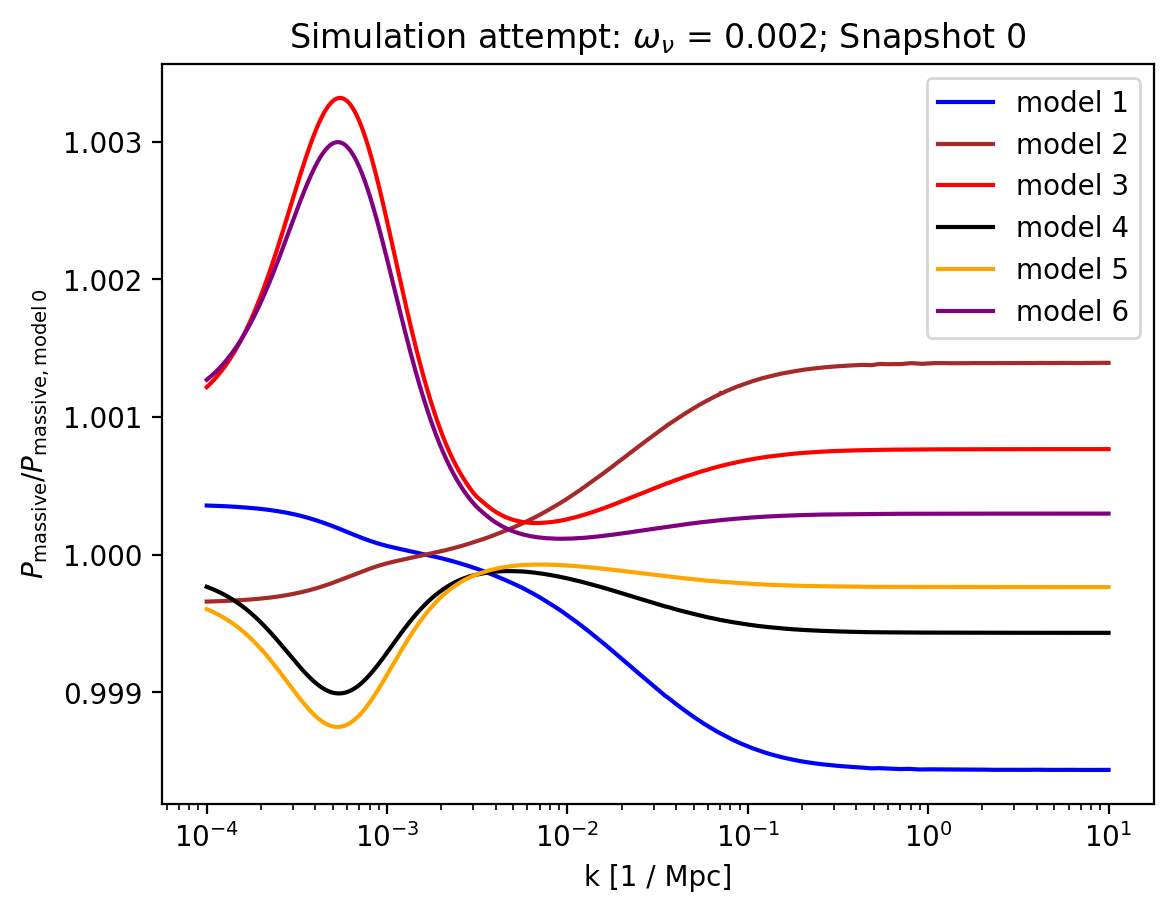

In [10]:
fig, axs = plt.subplots()
spectra.model_ratios_true(0, spec_sims[onh2_str], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str, title="Simulation attempt");

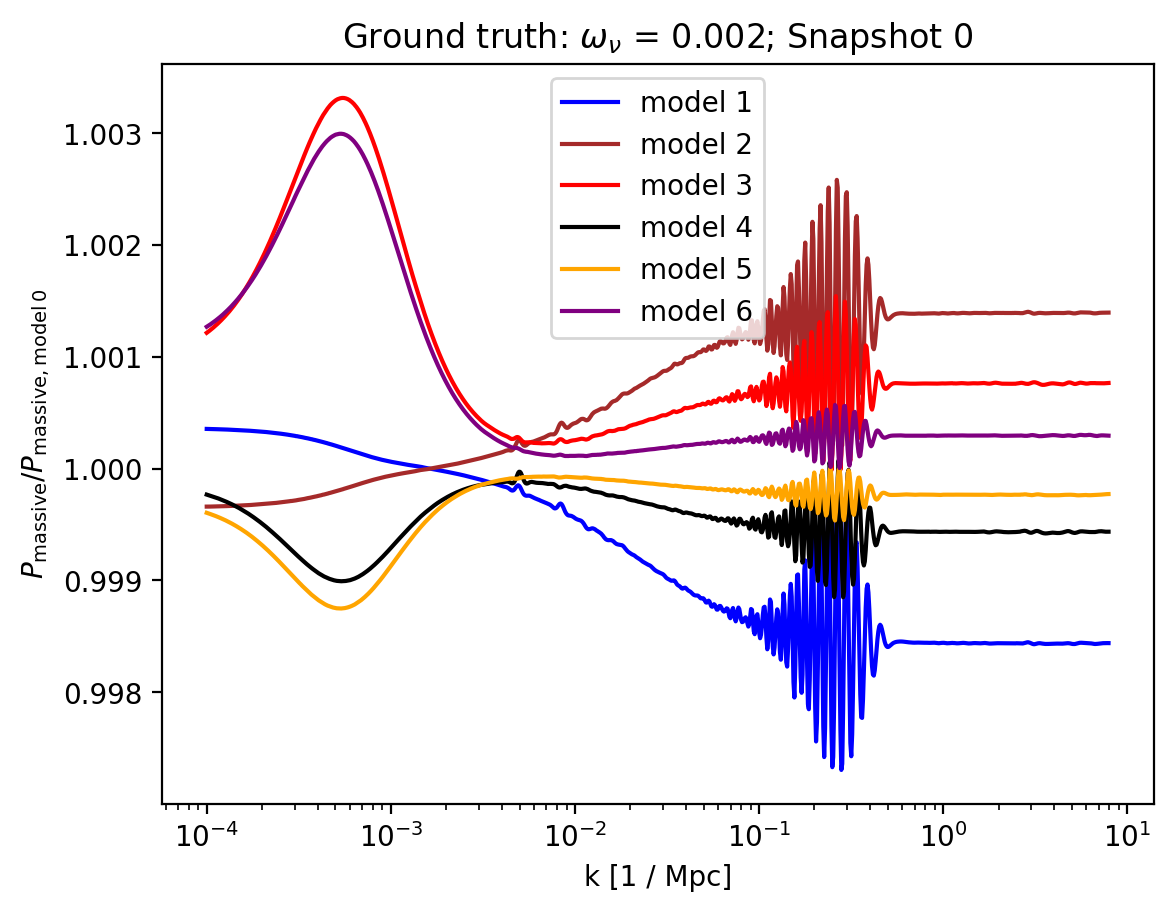

In [11]:
# What was this supposed to look like?
fig, axs = plt.subplots()
spectra.model_ratios_true(0, spectra.powernu3[onh2_str], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str);

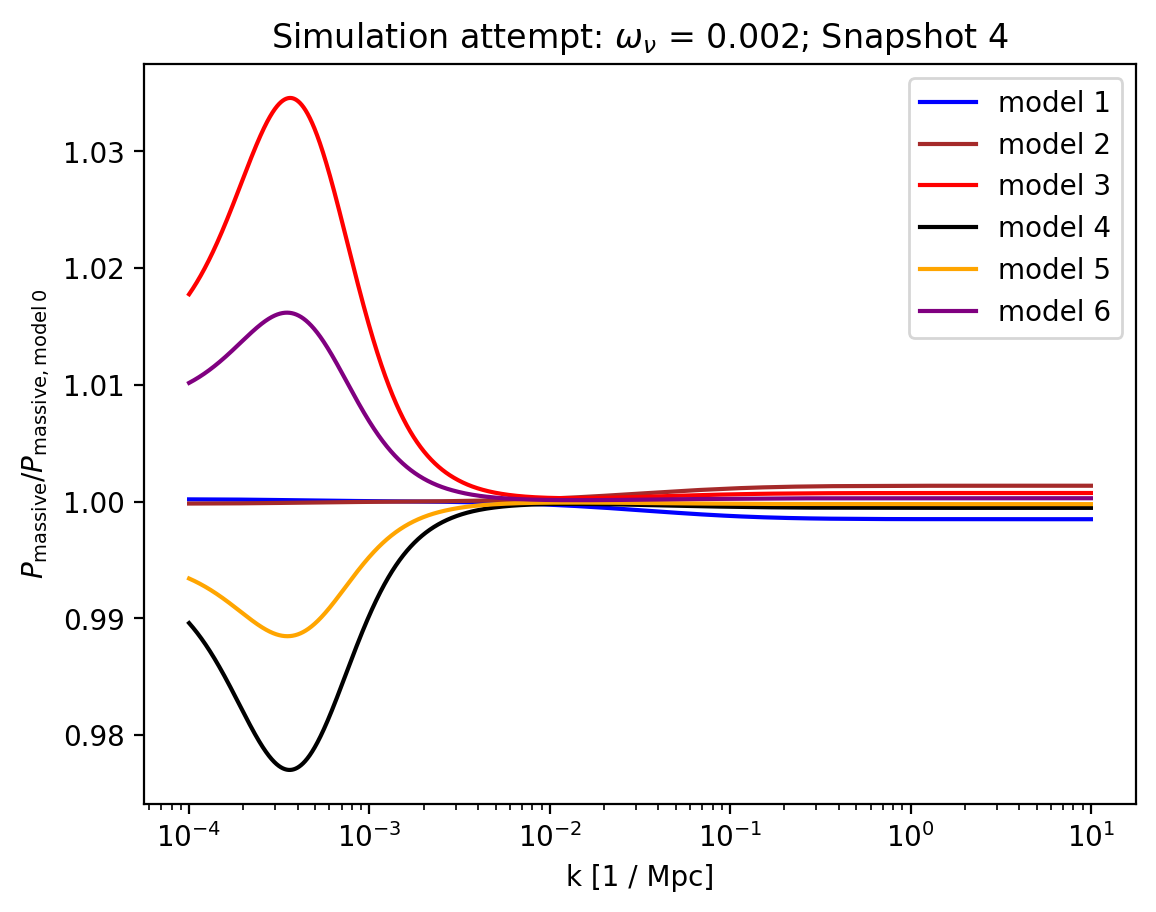

In [12]:
fig, axs = plt.subplots()
spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive=True, skips=[7, 8], omnuh2_str=onh2_str,
    title="Simulation attempt");

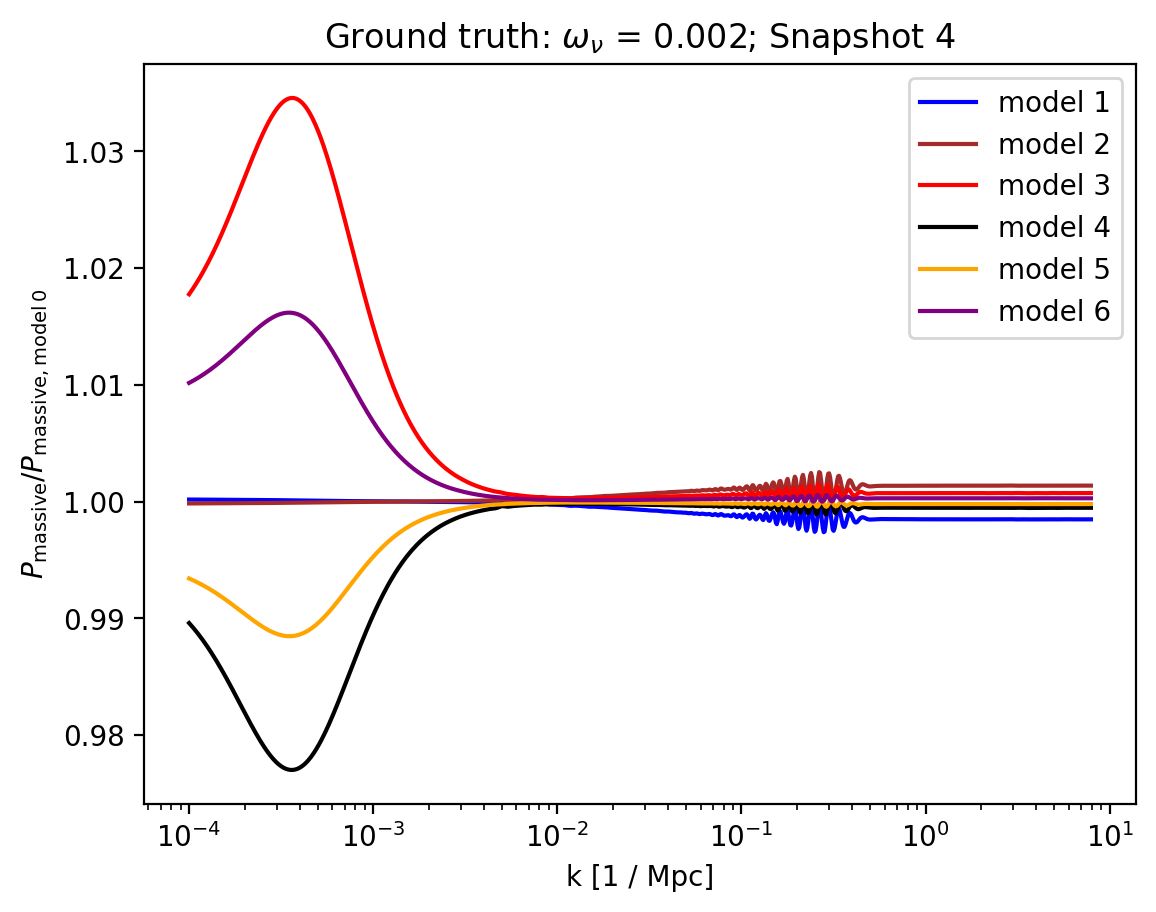

In [13]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu3[onh2_str], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str);

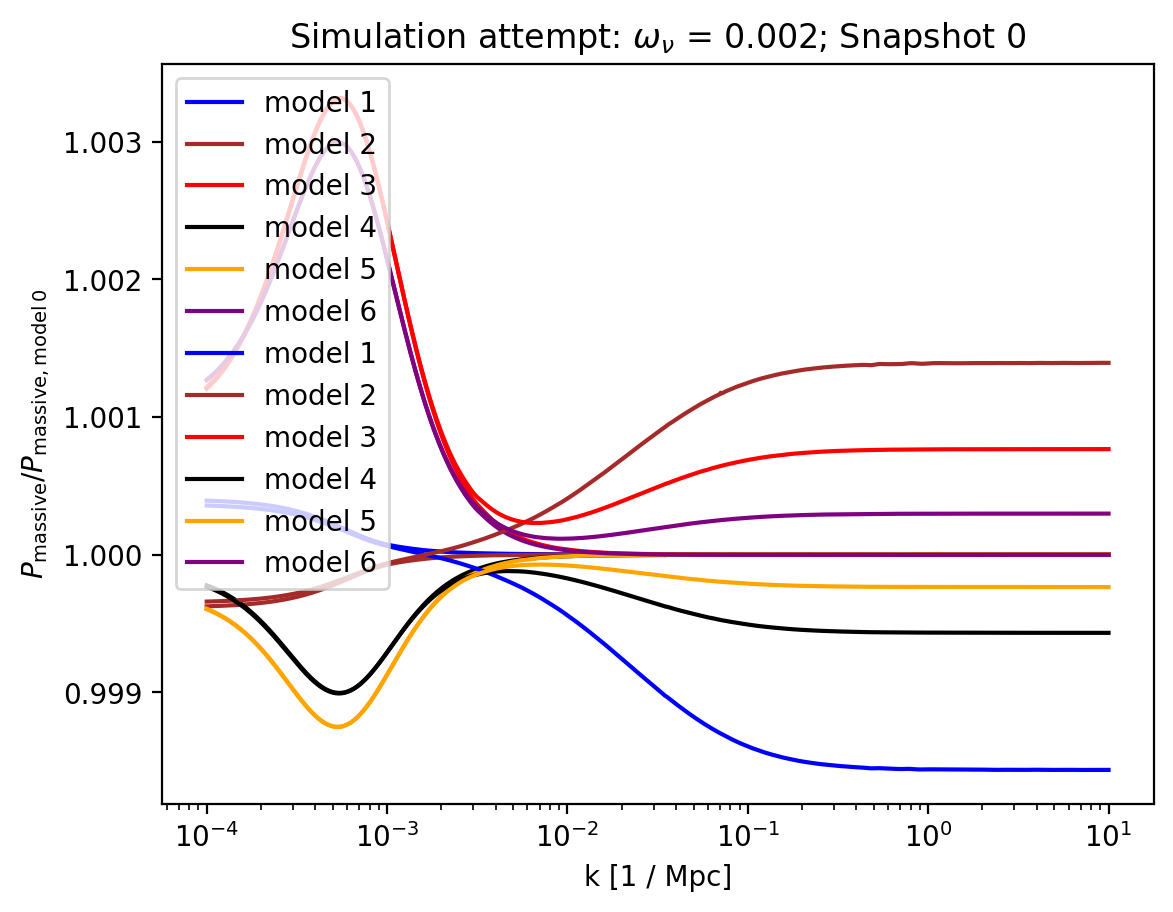

In [14]:
fig, axs = plt.subplots()
spectra.model_ratios_old(
    k_massless_list, p_massless_list, 0, axs, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", skips=[7, 8]);
spectra.model_ratios_true(0, spec_sims[onh2_str], axs,
    massive=True, skips=[7, 8], title="Simulation attempt");

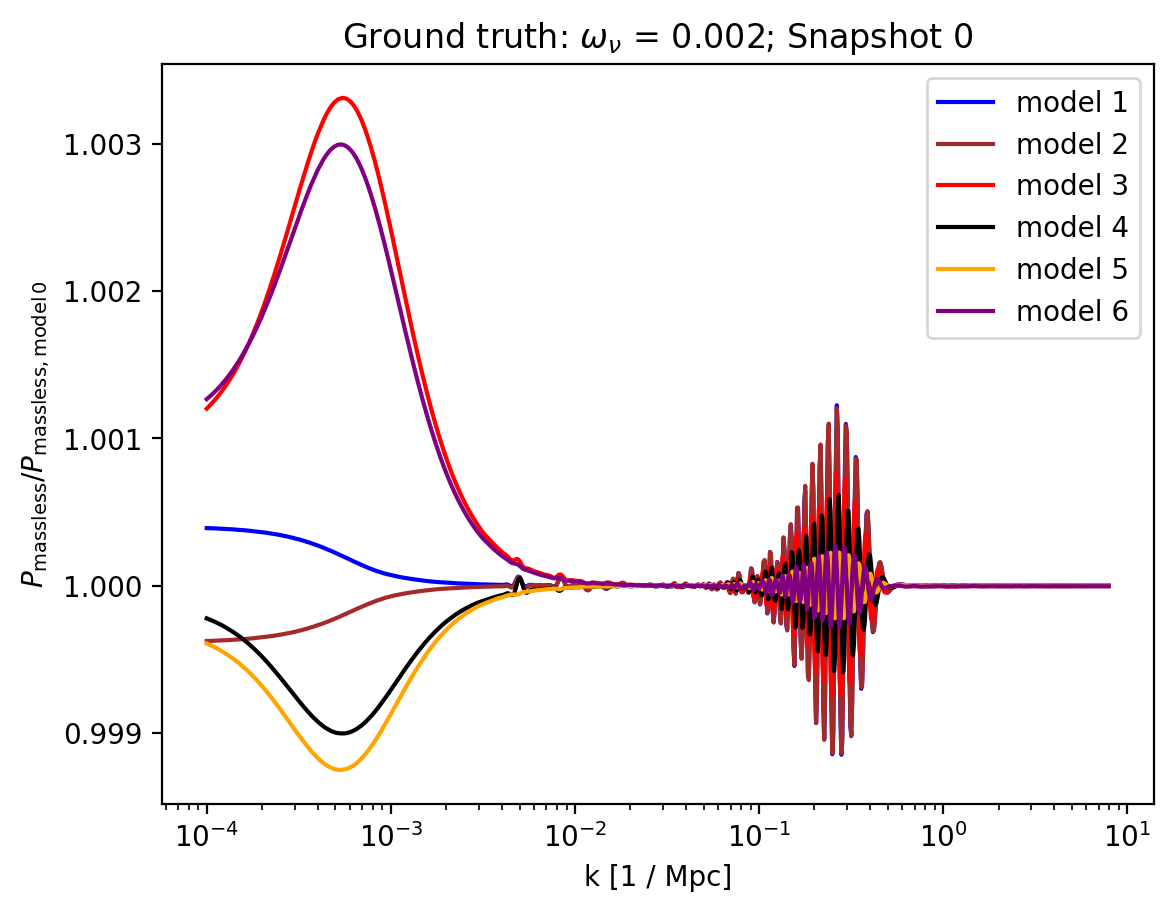

In [15]:
fig, axs = plt.subplots()
spectra.model_ratios_true(0, spectra.powernu3[onh2_str], axs,
    massive=False, skips=[7, 8], omnuh2_str=onh2_str);

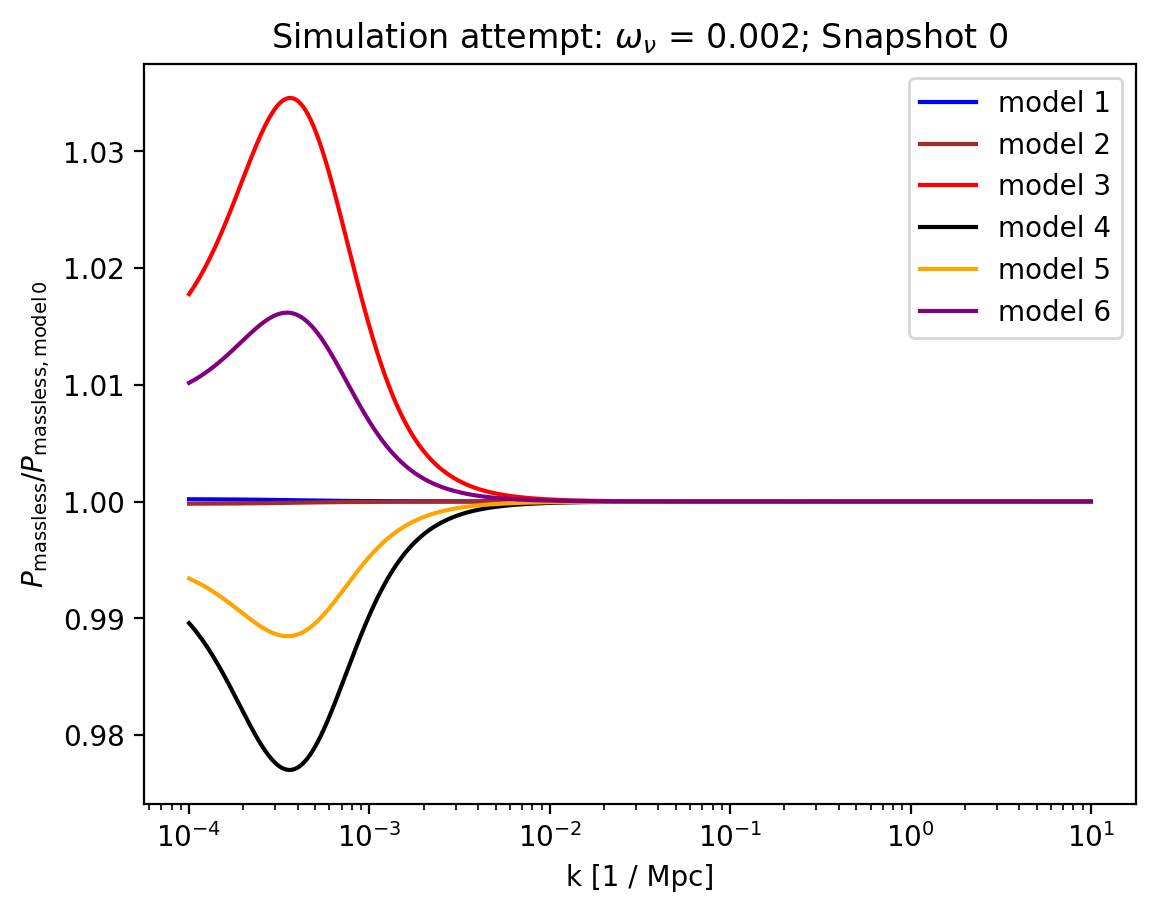

In [16]:
fig, axs = plt.subplots()
spectra.model_ratios_old(
    k_massless_list, p_massless_list, 4, axs, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", skips=[7, 8]);

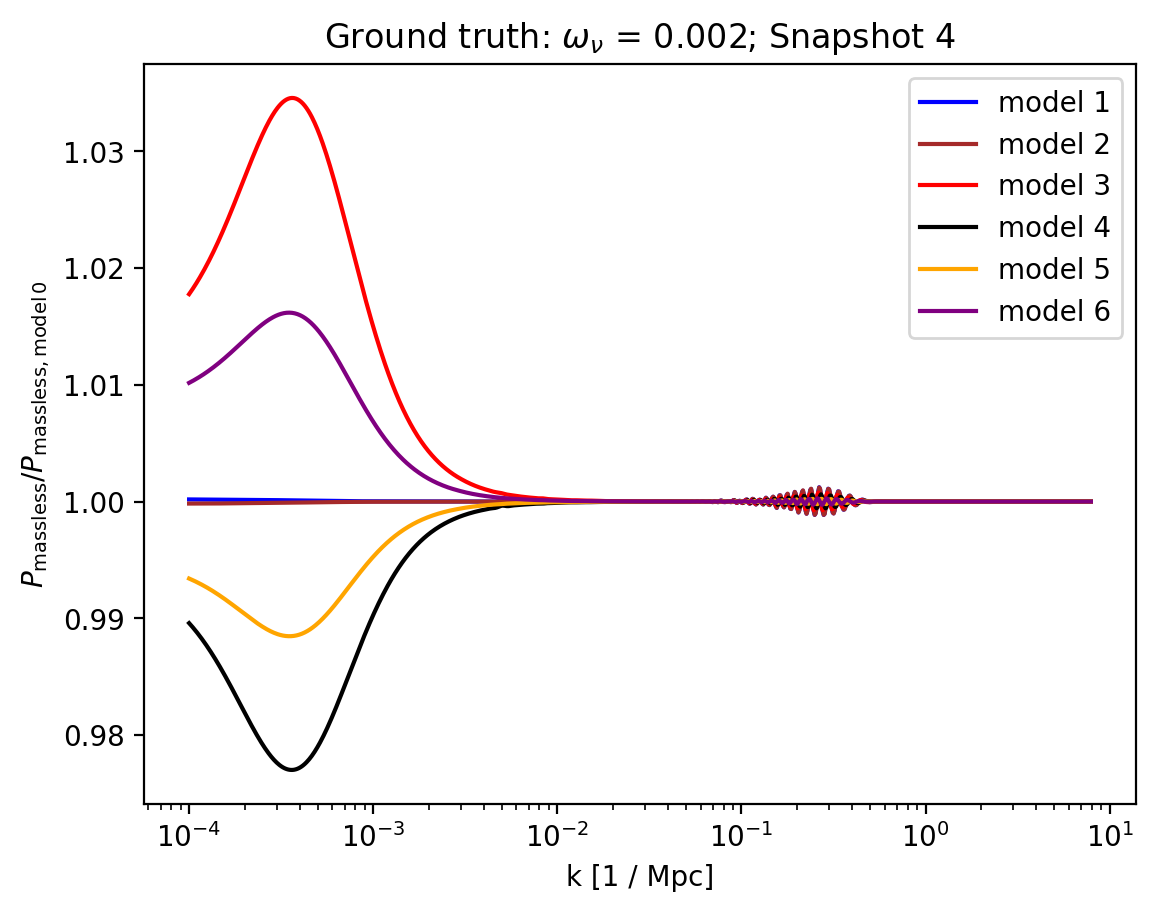

In [17]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu3[onh2_str], axs,
    massive=False, skips=[7, 8], omnuh2_str=onh2_str);

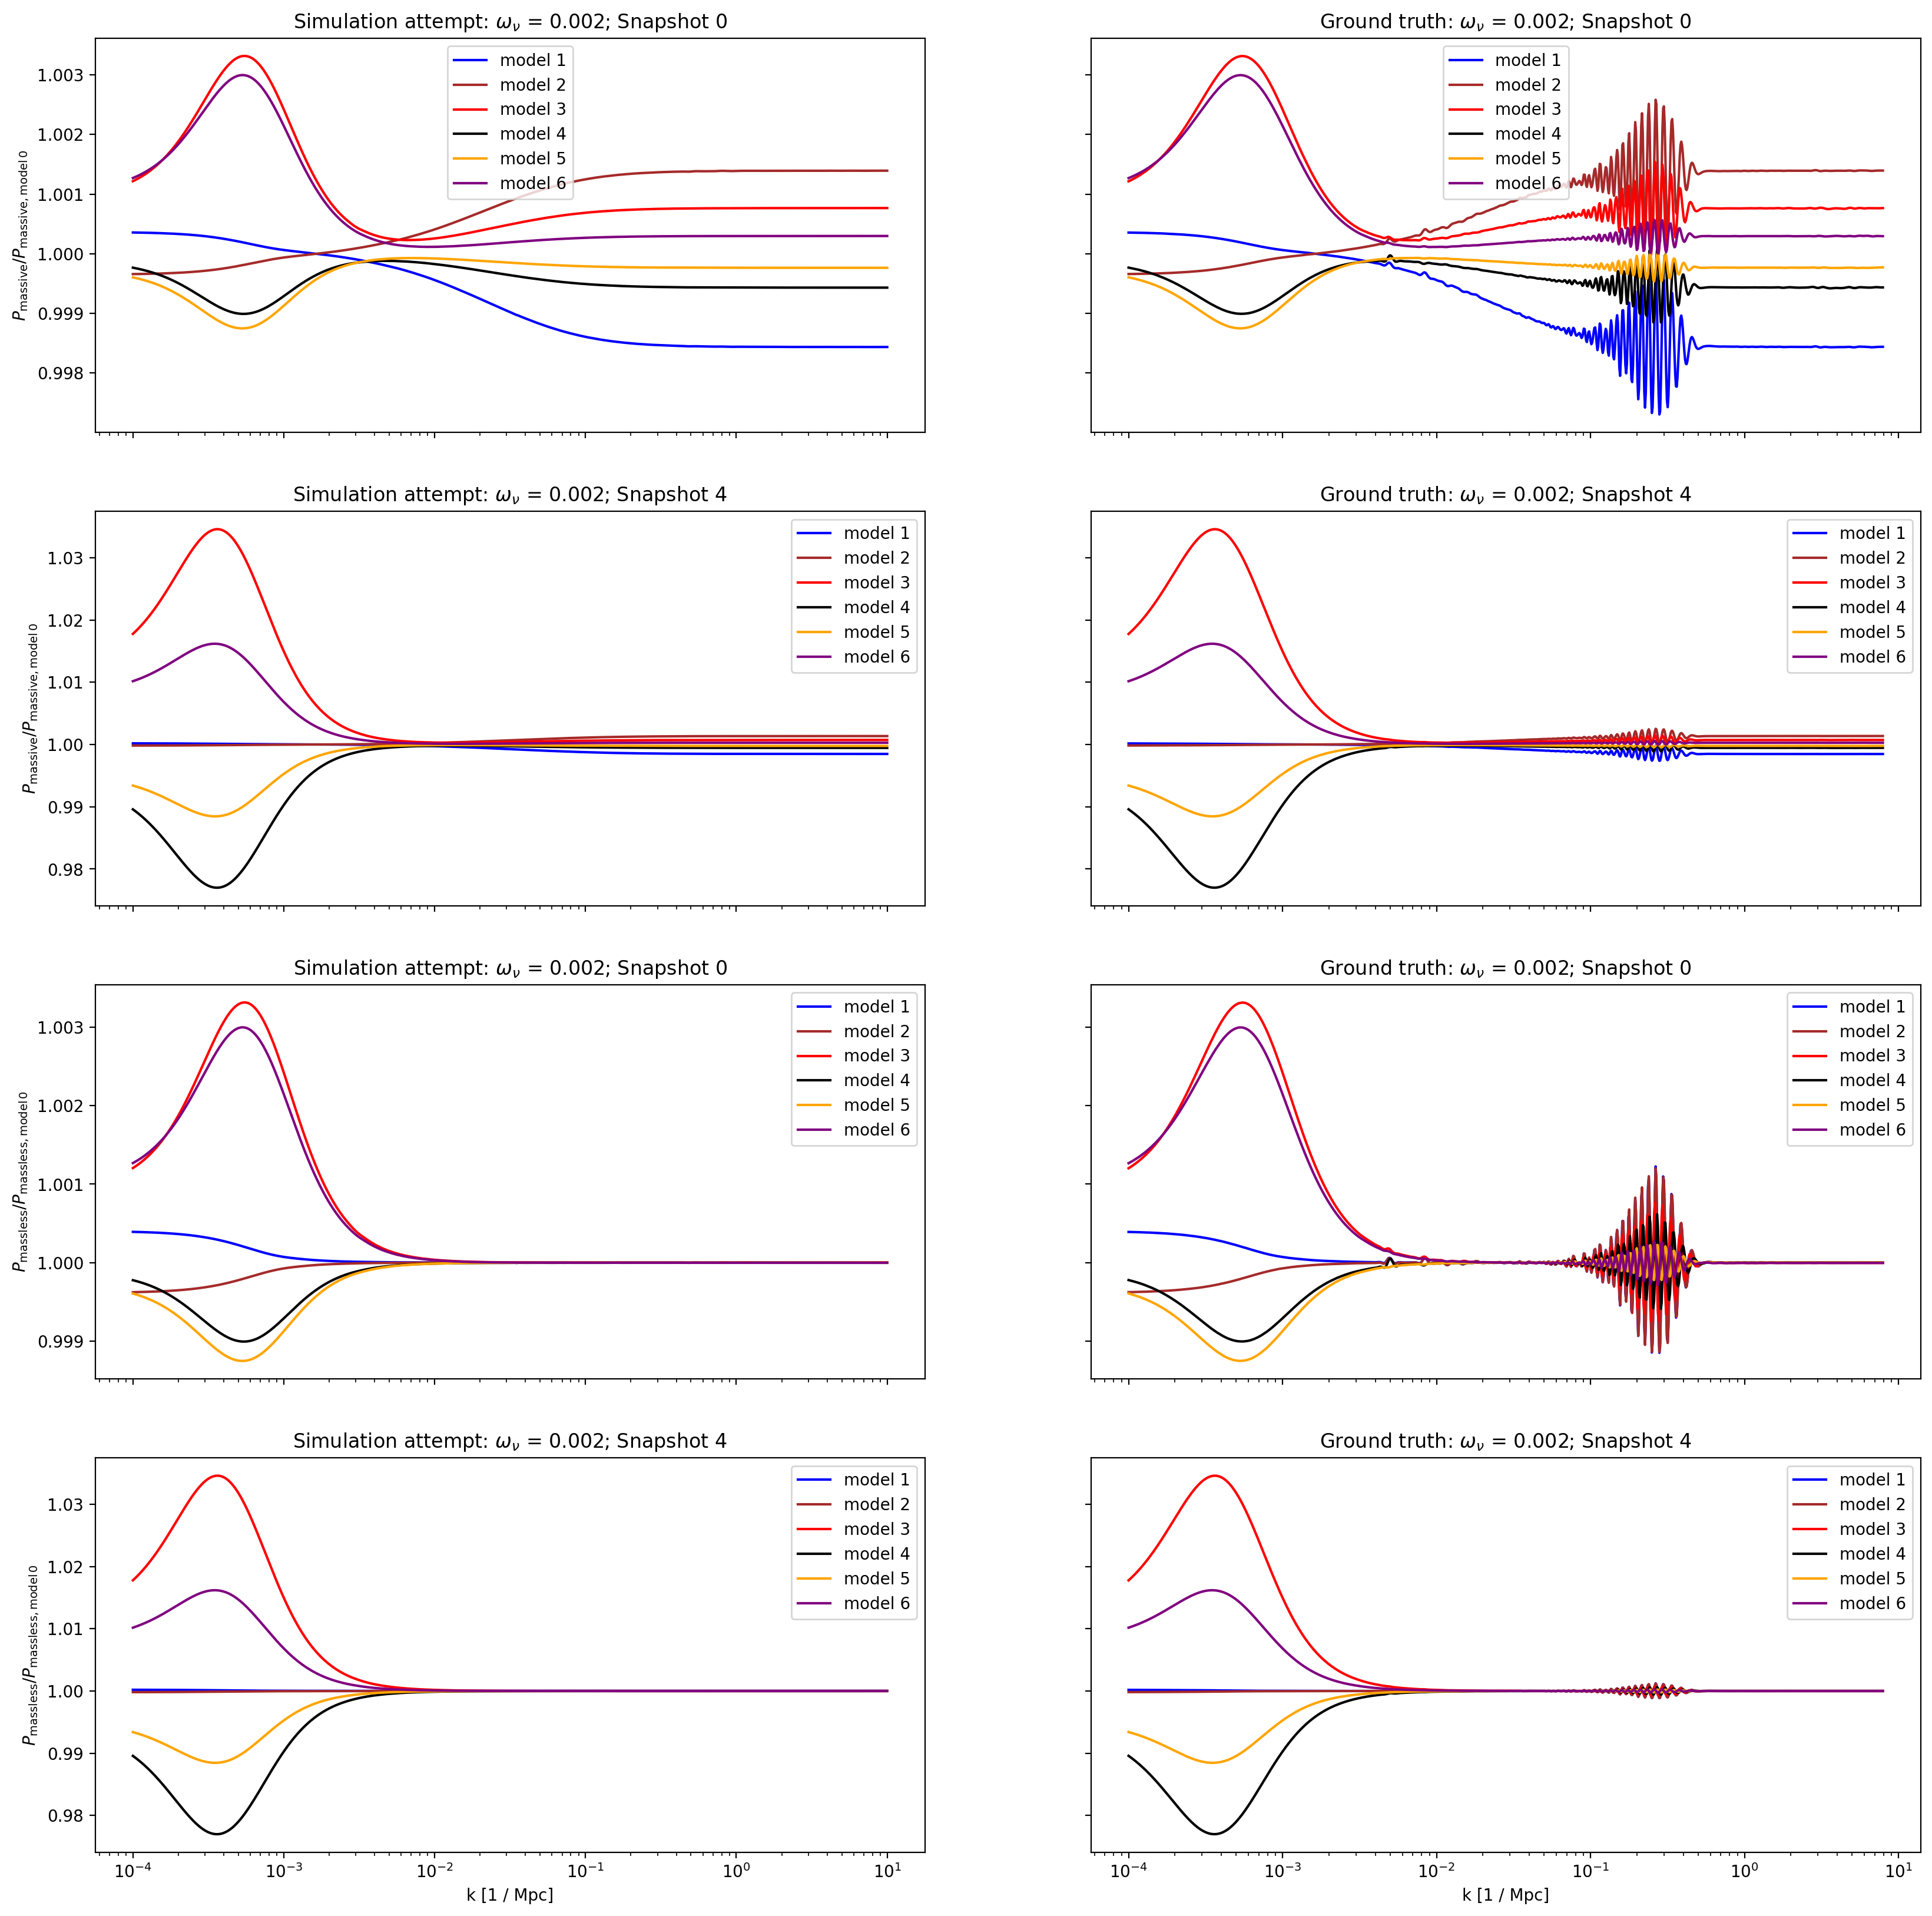

In [18]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(4, 2, sharex="col", sharey="row")
spectra.model_ratios_old(
    k_massive_list, p_massive_list, 0, axs, "massive",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", [7, 8], [0, 0], ['y'])
spectra.model_ratios_true(0, spectra.powernu3[onh2_str], axs, True,
    [7, 8], [0, 1], []);
spectra.model_ratios_old(
    k_massive_list, p_massive_list, 4, axs, "massive",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 4", [7, 8], [1, 0], ['y'])
spectra.model_ratios_true(4, spectra.powernu3[onh2_str], axs, True,
    [7, 8], [1, 1], []);
spectra.model_ratios_old(
    k_massless_list, p_massless_list, 0, axs, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", [7, 8], [2, 0], ['y'])
spectra.model_ratios_true(0, spectra.powernu3[onh2_str], axs, False,
    [7, 8], [2, 1], []);
spectra.model_ratios_old(
    k_massless_list, p_massless_list, 4, axs, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 4", [7, 8], [3, 0], ['x', 'y'])
spectra.model_ratios_true(4, spectra.powernu3[onh2_str], axs, False,
    [7, 8], [3, 1], ['x']);

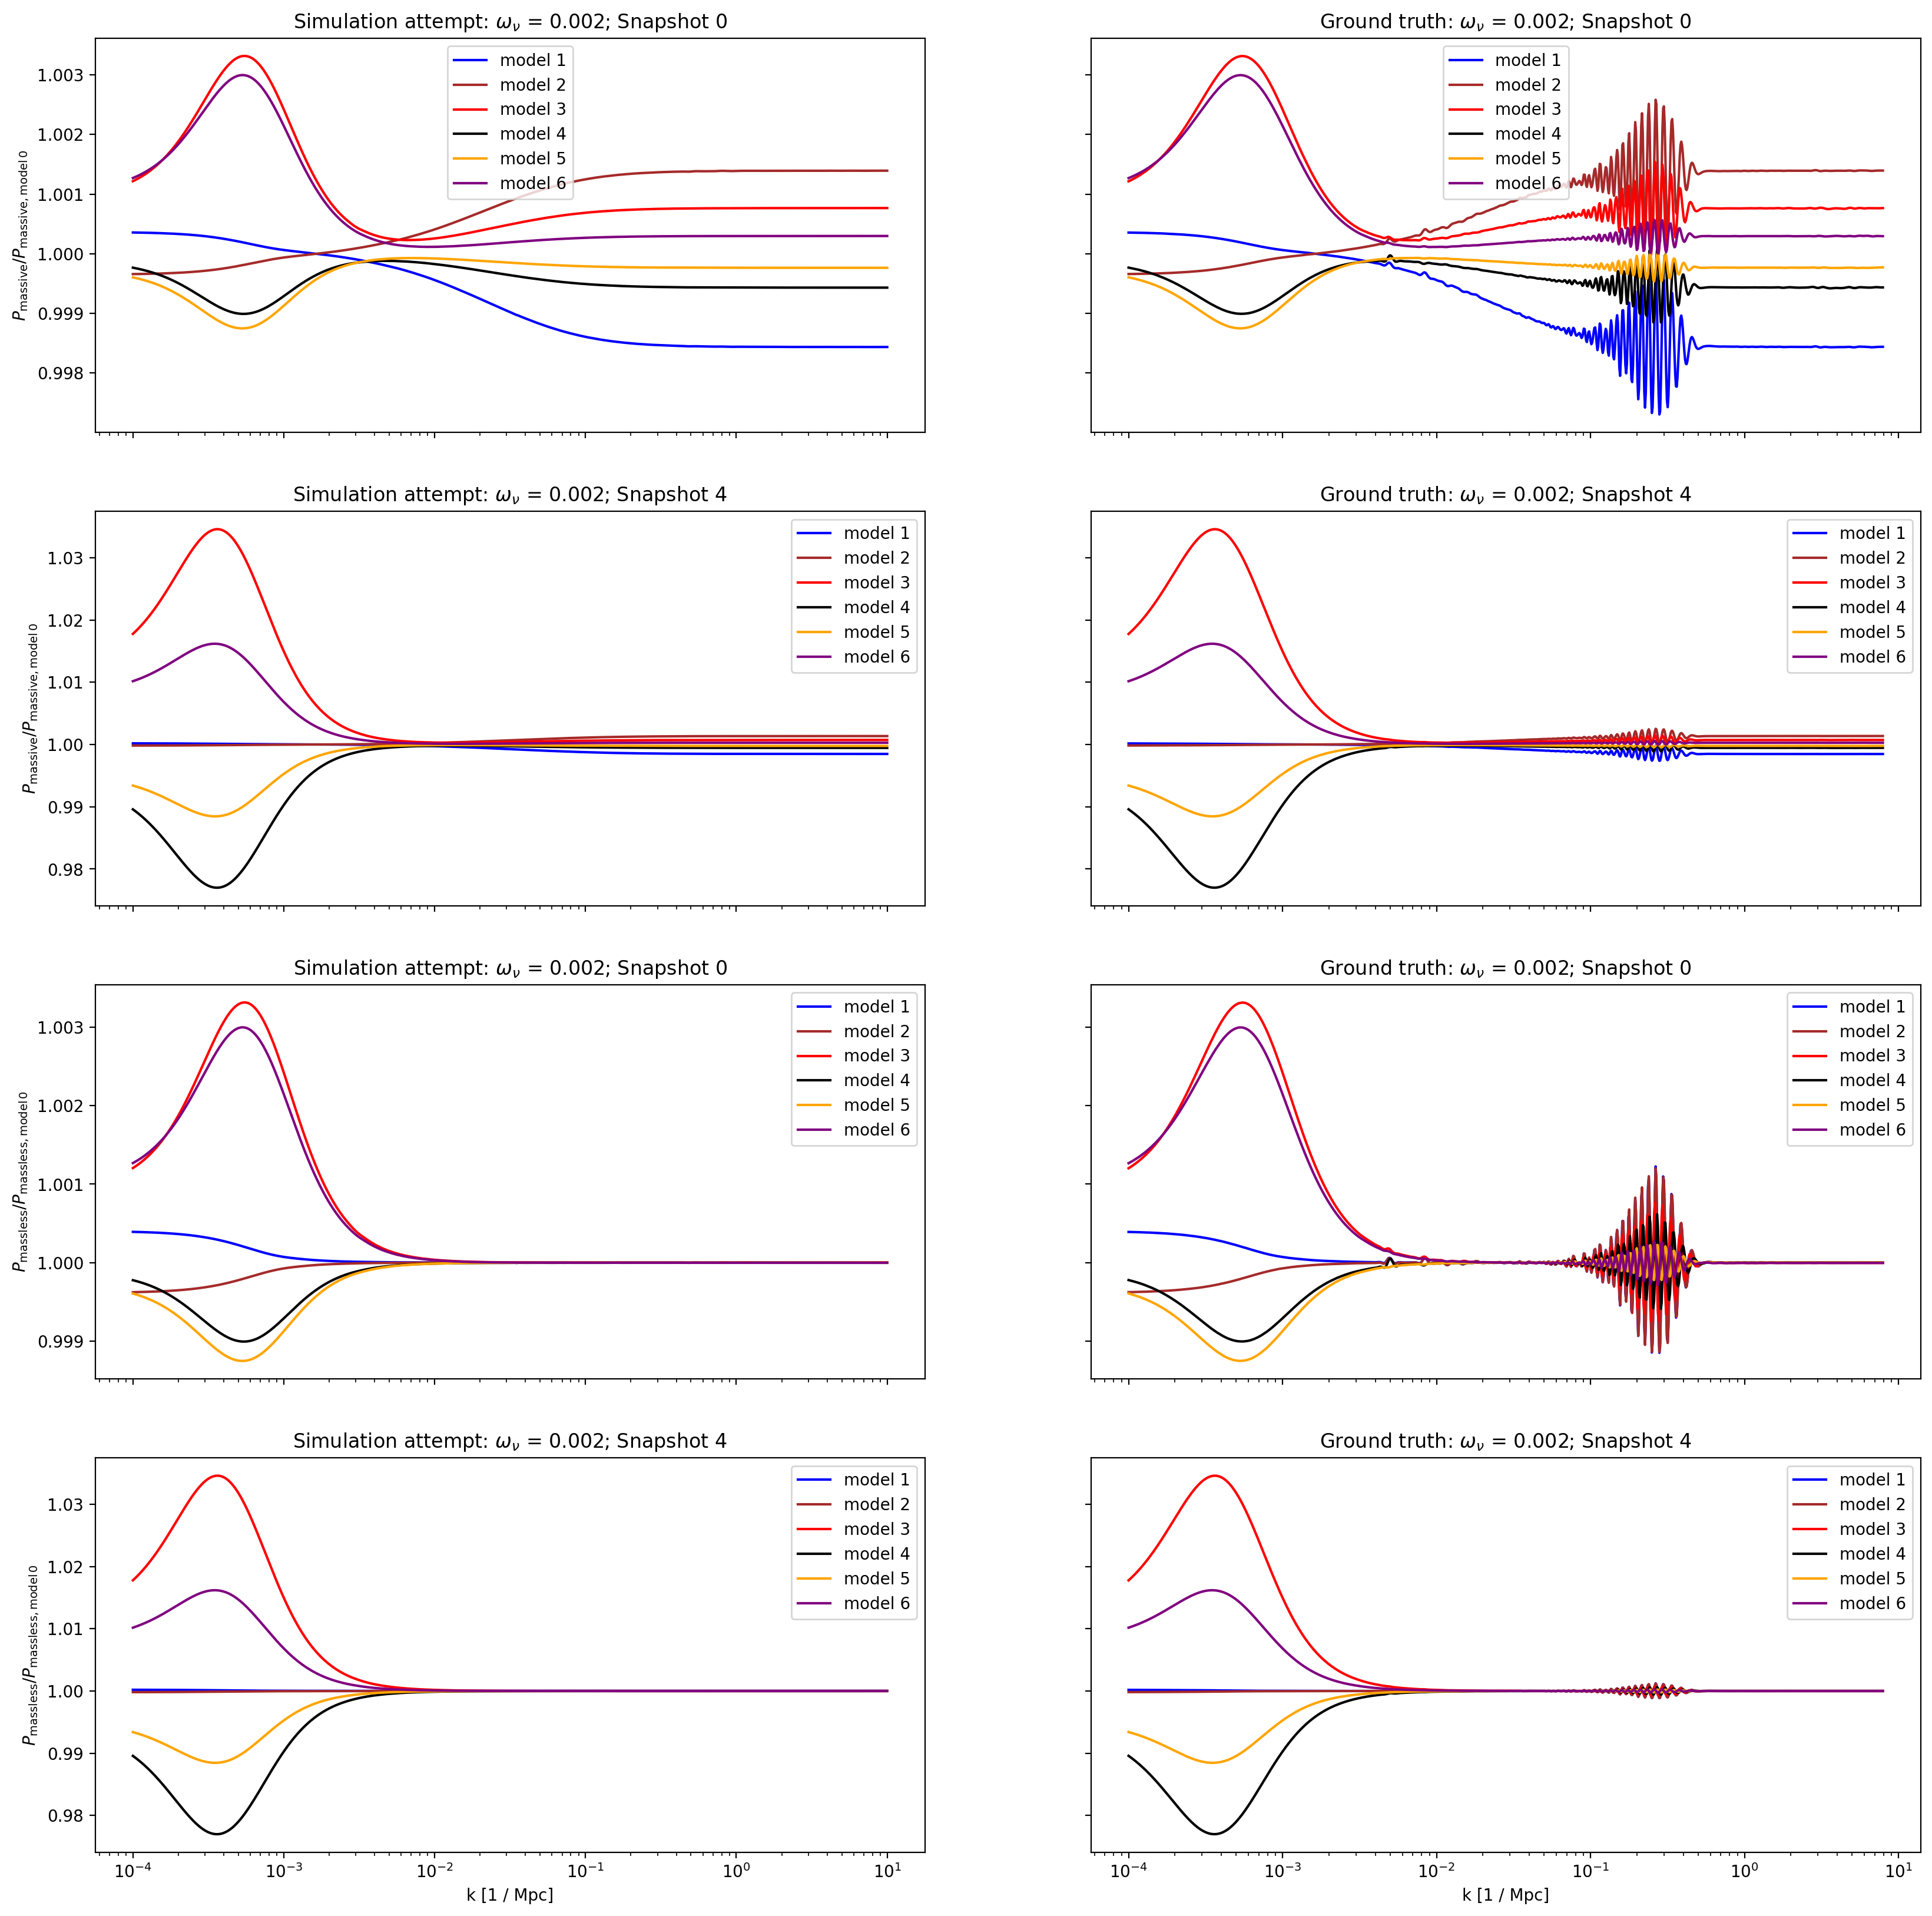

In [19]:
fig, axs = plt.subplots(4, 2, sharex="col", sharey="row")
spectra.model_ratios_old(
    k_massive_list, p_massive_list, 0, axs, "massive",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", [7, 8], [0, 0], ['y'])
spectra.model_ratios_true(0, spectra.powernu3[onh2_str], axs, True, [7, 8],
    [0, 1], []);
spectra.model_ratios_old(
    k_massive_list, p_massive_list, 4, axs, "massive",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 4", [7, 8], [1, 0], ['y'])
spectra.model_ratios_true(4, spectra.powernu3[onh2_str], axs, True, [7, 8],
    [1, 1], []);
spectra.model_ratios_old(
    k_massless_list, p_massless_list, 0, axs, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", [7, 8], [2, 0], ['y'])
spectra.model_ratios_true(0, spectra.powernu3[onh2_str], axs, False, [7, 8],
    [2, 1], []);
spectra.model_ratios_old(
    k_massless_list, p_massless_list, 4, axs, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 4", [7, 8], [3, 0], ['x', 'y'])
spectra.model_ratios_true(4, spectra.powernu3[onh2_str], axs, False, [7, 8],
    [3, 1], ['x']);

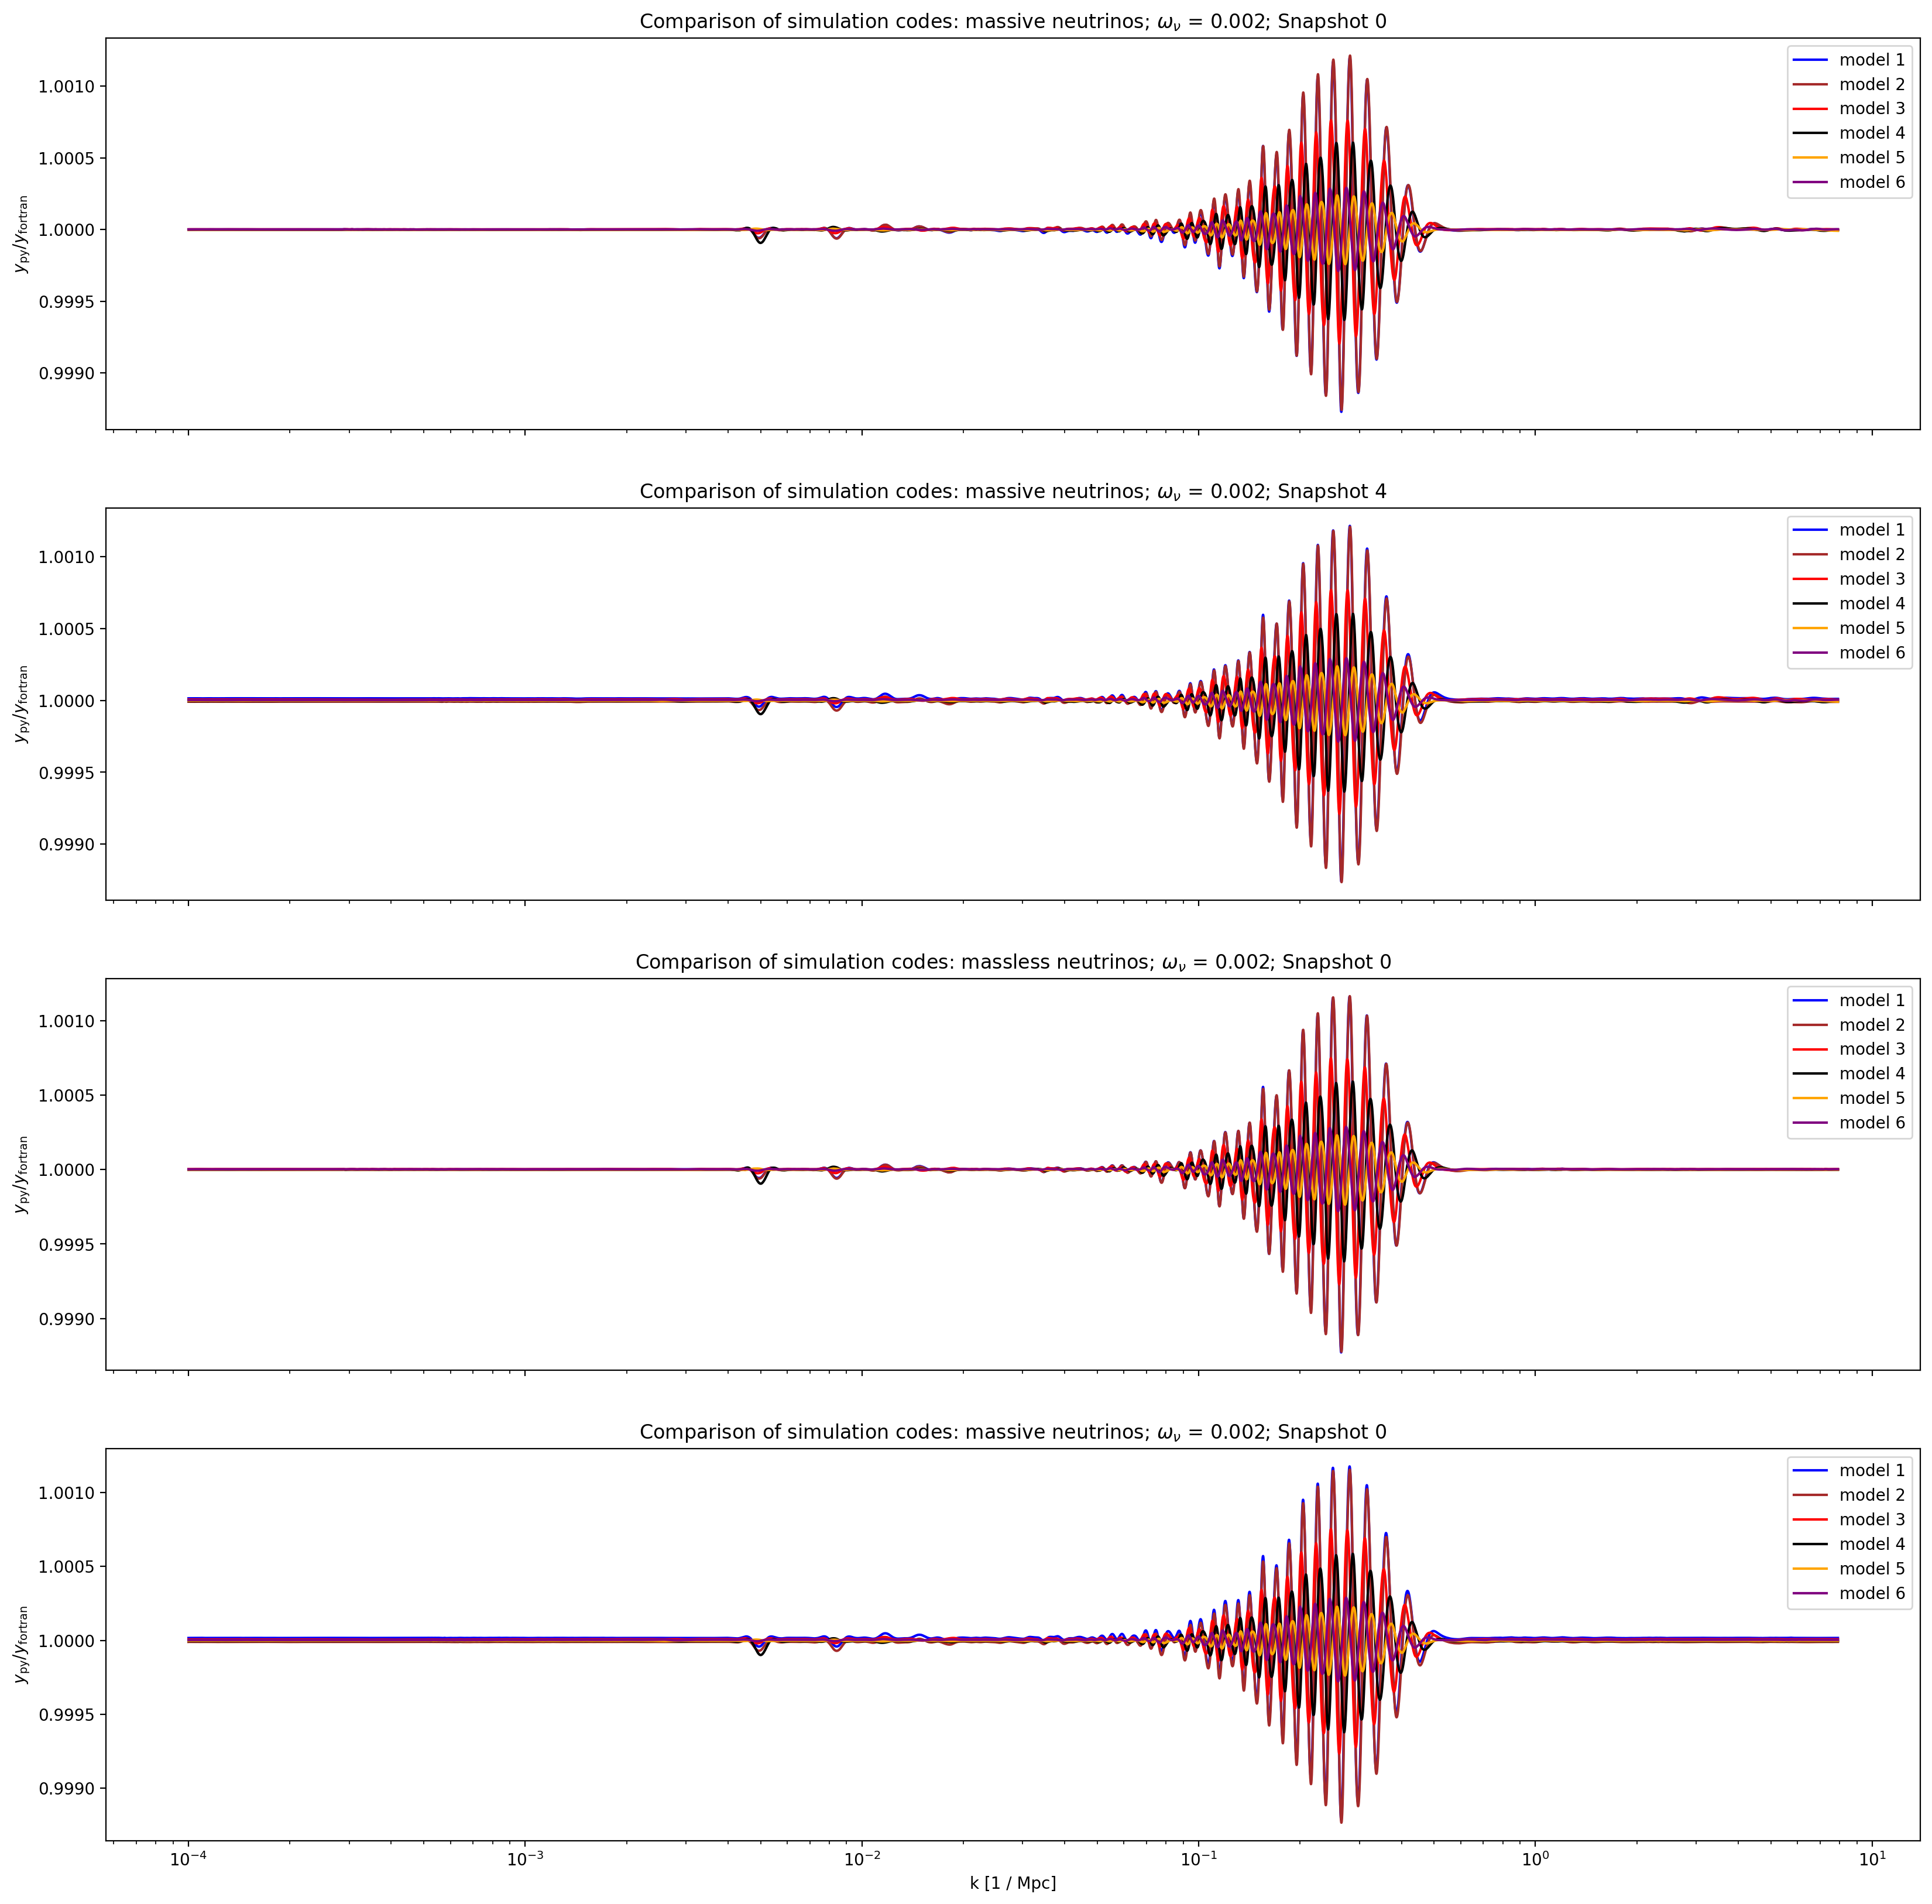

In [20]:
fig, axs = plt.subplots(4, 1, sharex="col", sharey="row")
spectra.compare_wrappers(
    k_massive_list, p_massive_list, spectra.powernu3[onh2_str], 0, axs, True,
    "massive",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 0, ['y'])
spectra.compare_wrappers(
    k_massive_list, p_massive_list, spectra.powernu3[onh2_str], 4, axs, True,
    "massive",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 4", [7, 8], 1, ['y'])
spectra.compare_wrappers(
    k_massless_list, p_massless_list, spectra.powernu3[onh2_str], 0, axs, False,
    "massless",
    r"Comparison of simulation codes: massless neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 2, ['y'])
spectra.compare_wrappers(
    k_massless_list, p_massless_list, spectra.powernu3[onh2_str], 4, axs, False,
    "massless",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 3, ['x', 'y'])

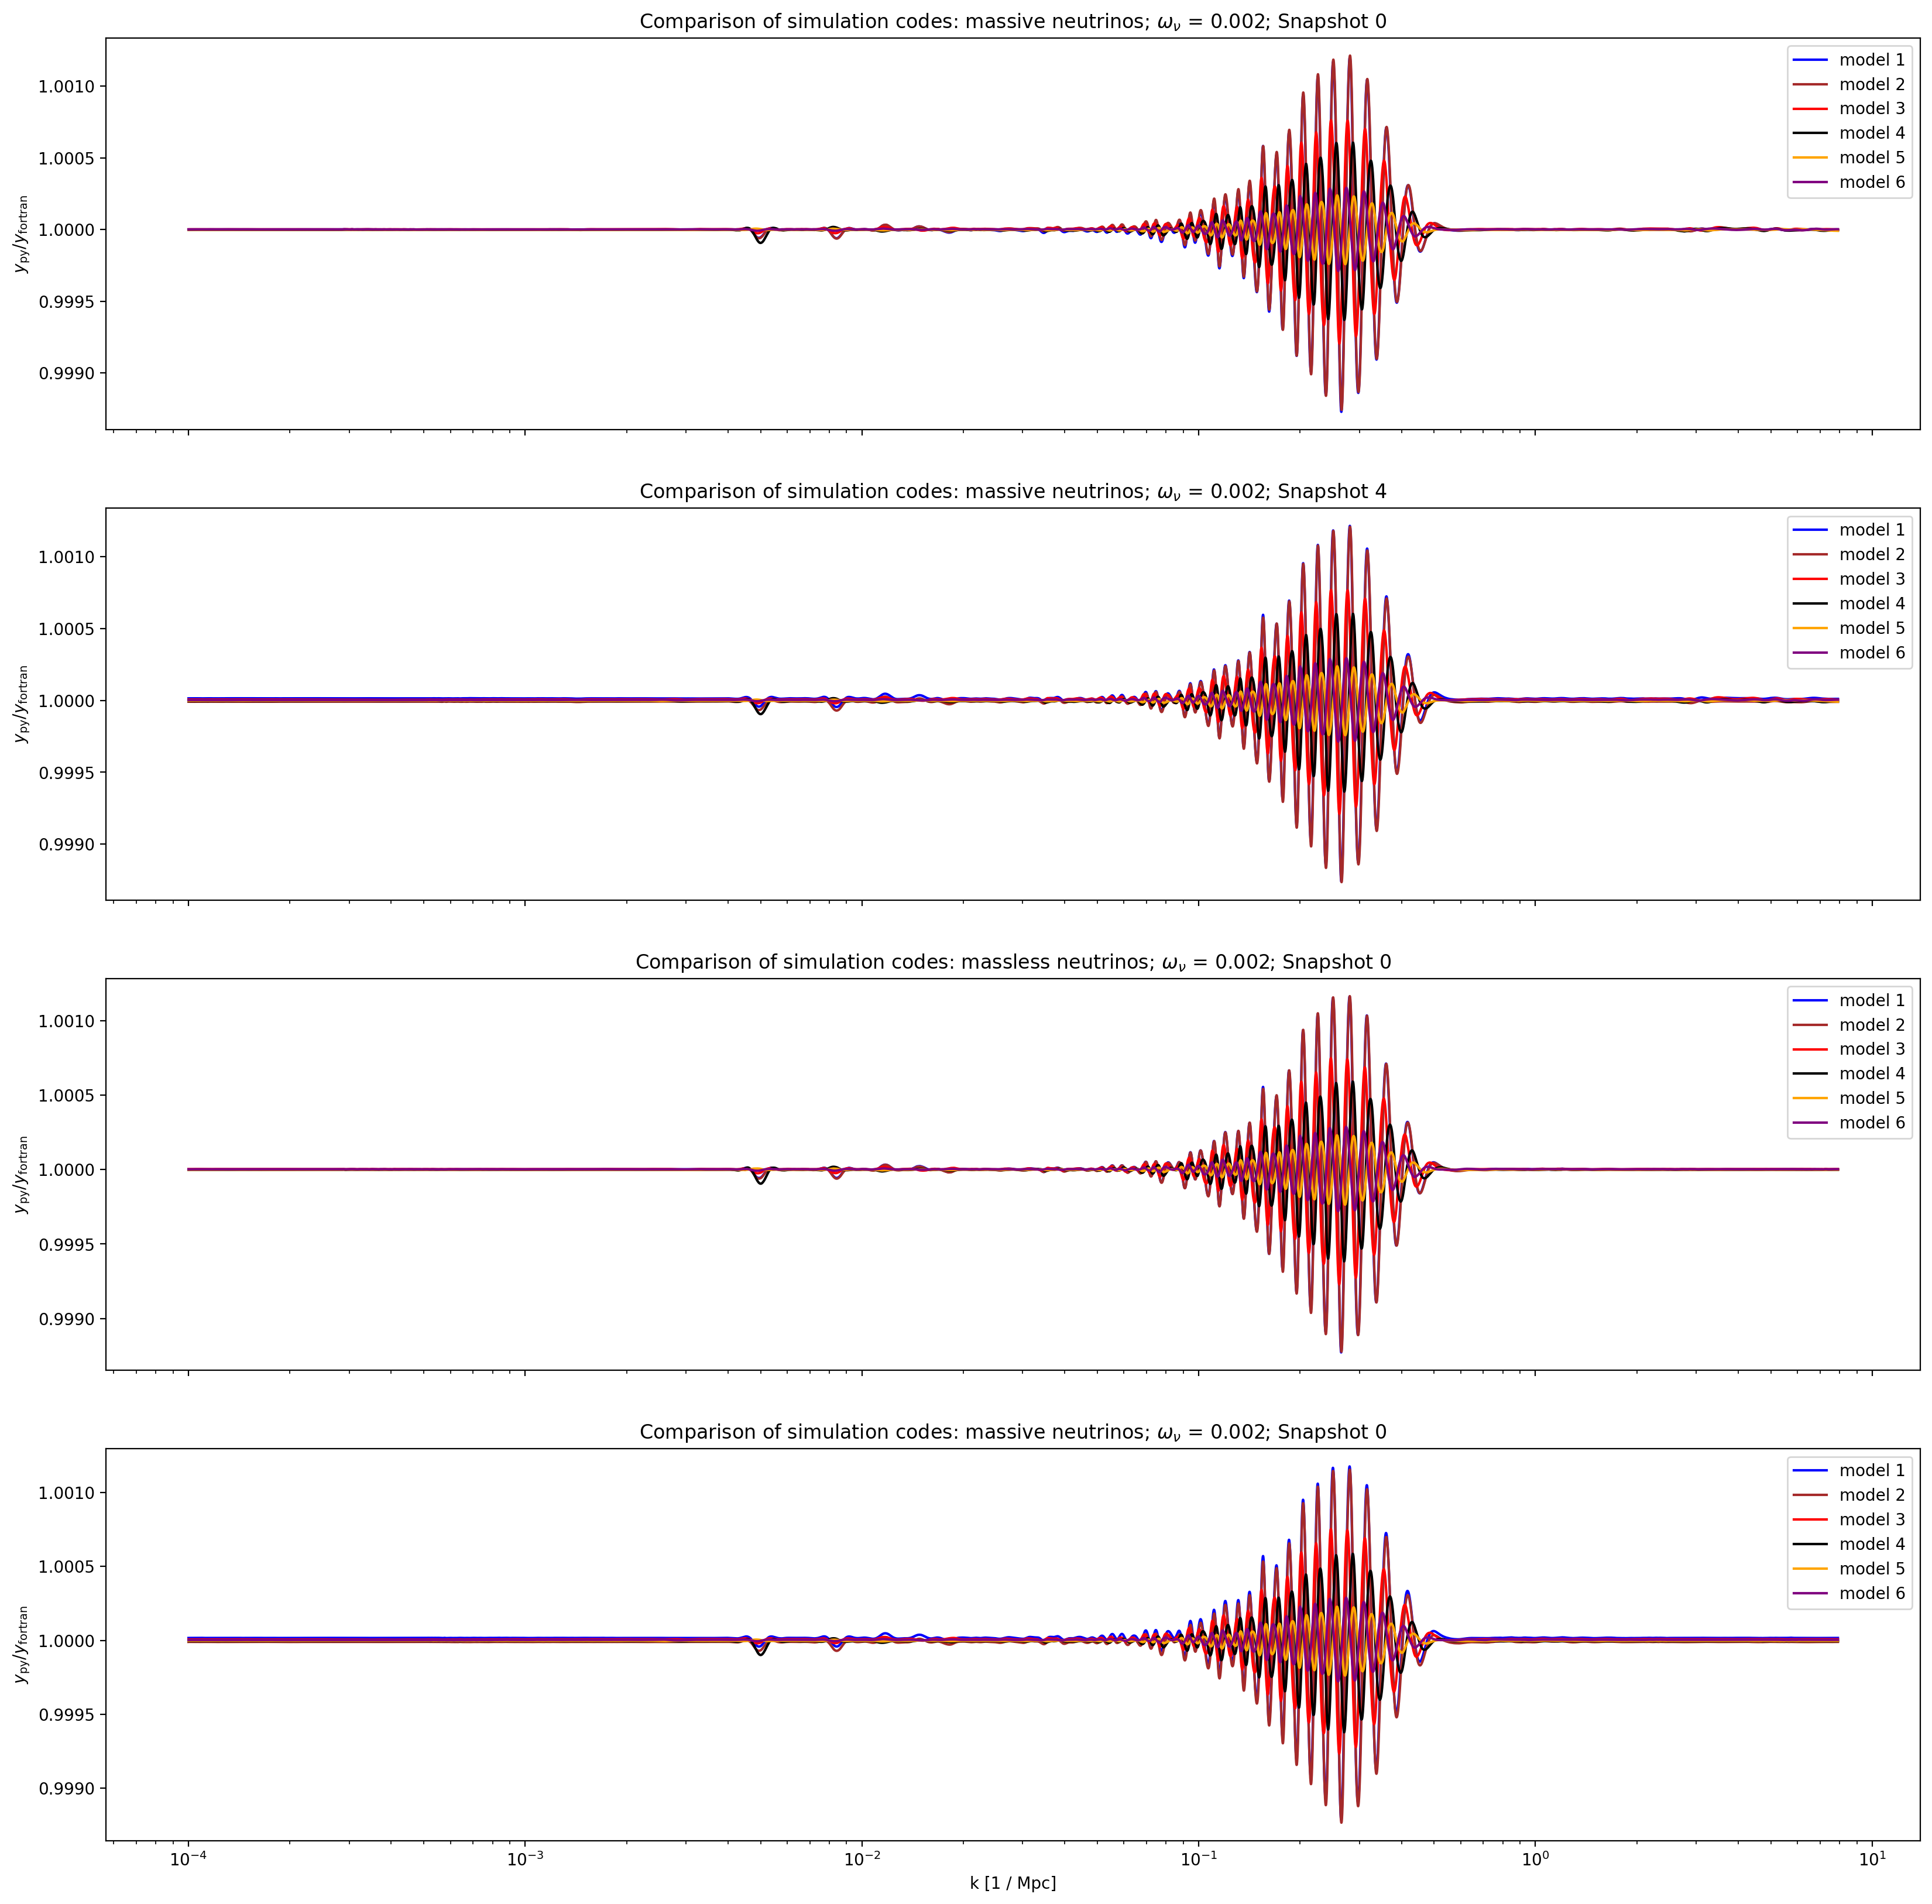

In [21]:
fig, axs = plt.subplots(4, 1, sharex="col", sharey="row")
spectra.compare_wrappers(
    k_massive_list, p_massive_list, spectra.powernu2, 0, axs, True,
    "massive",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 0, ['y'])
spectra.compare_wrappers(
    k_massive_list, p_massive_list, spectra.powernu2, 4, axs, True,
    "massive",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 4", [7, 8], 1, ['y'])
spectra.compare_wrappers(
    k_massless_list, p_massless_list, spectra.powernu2, 0, axs, False,
    "massless",
    r"Comparison of simulation codes: massless neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 2, ['y'])
spectra.compare_wrappers(
    k_massless_list, p_massless_list, spectra.powernu2, 4, axs, False,
    "massless",
    r"Comparison of simulation codes: massive neutrinos; $\omega_\nu$ = " + \
        onh2_str + "; Snapshot 0", [7, 8], 3, ['x', 'y'])

In [22]:
x_list = []
for i in range(len(p_massive_list)):
    x_list.append(p_massive_list[i] / p_massless_list[i])

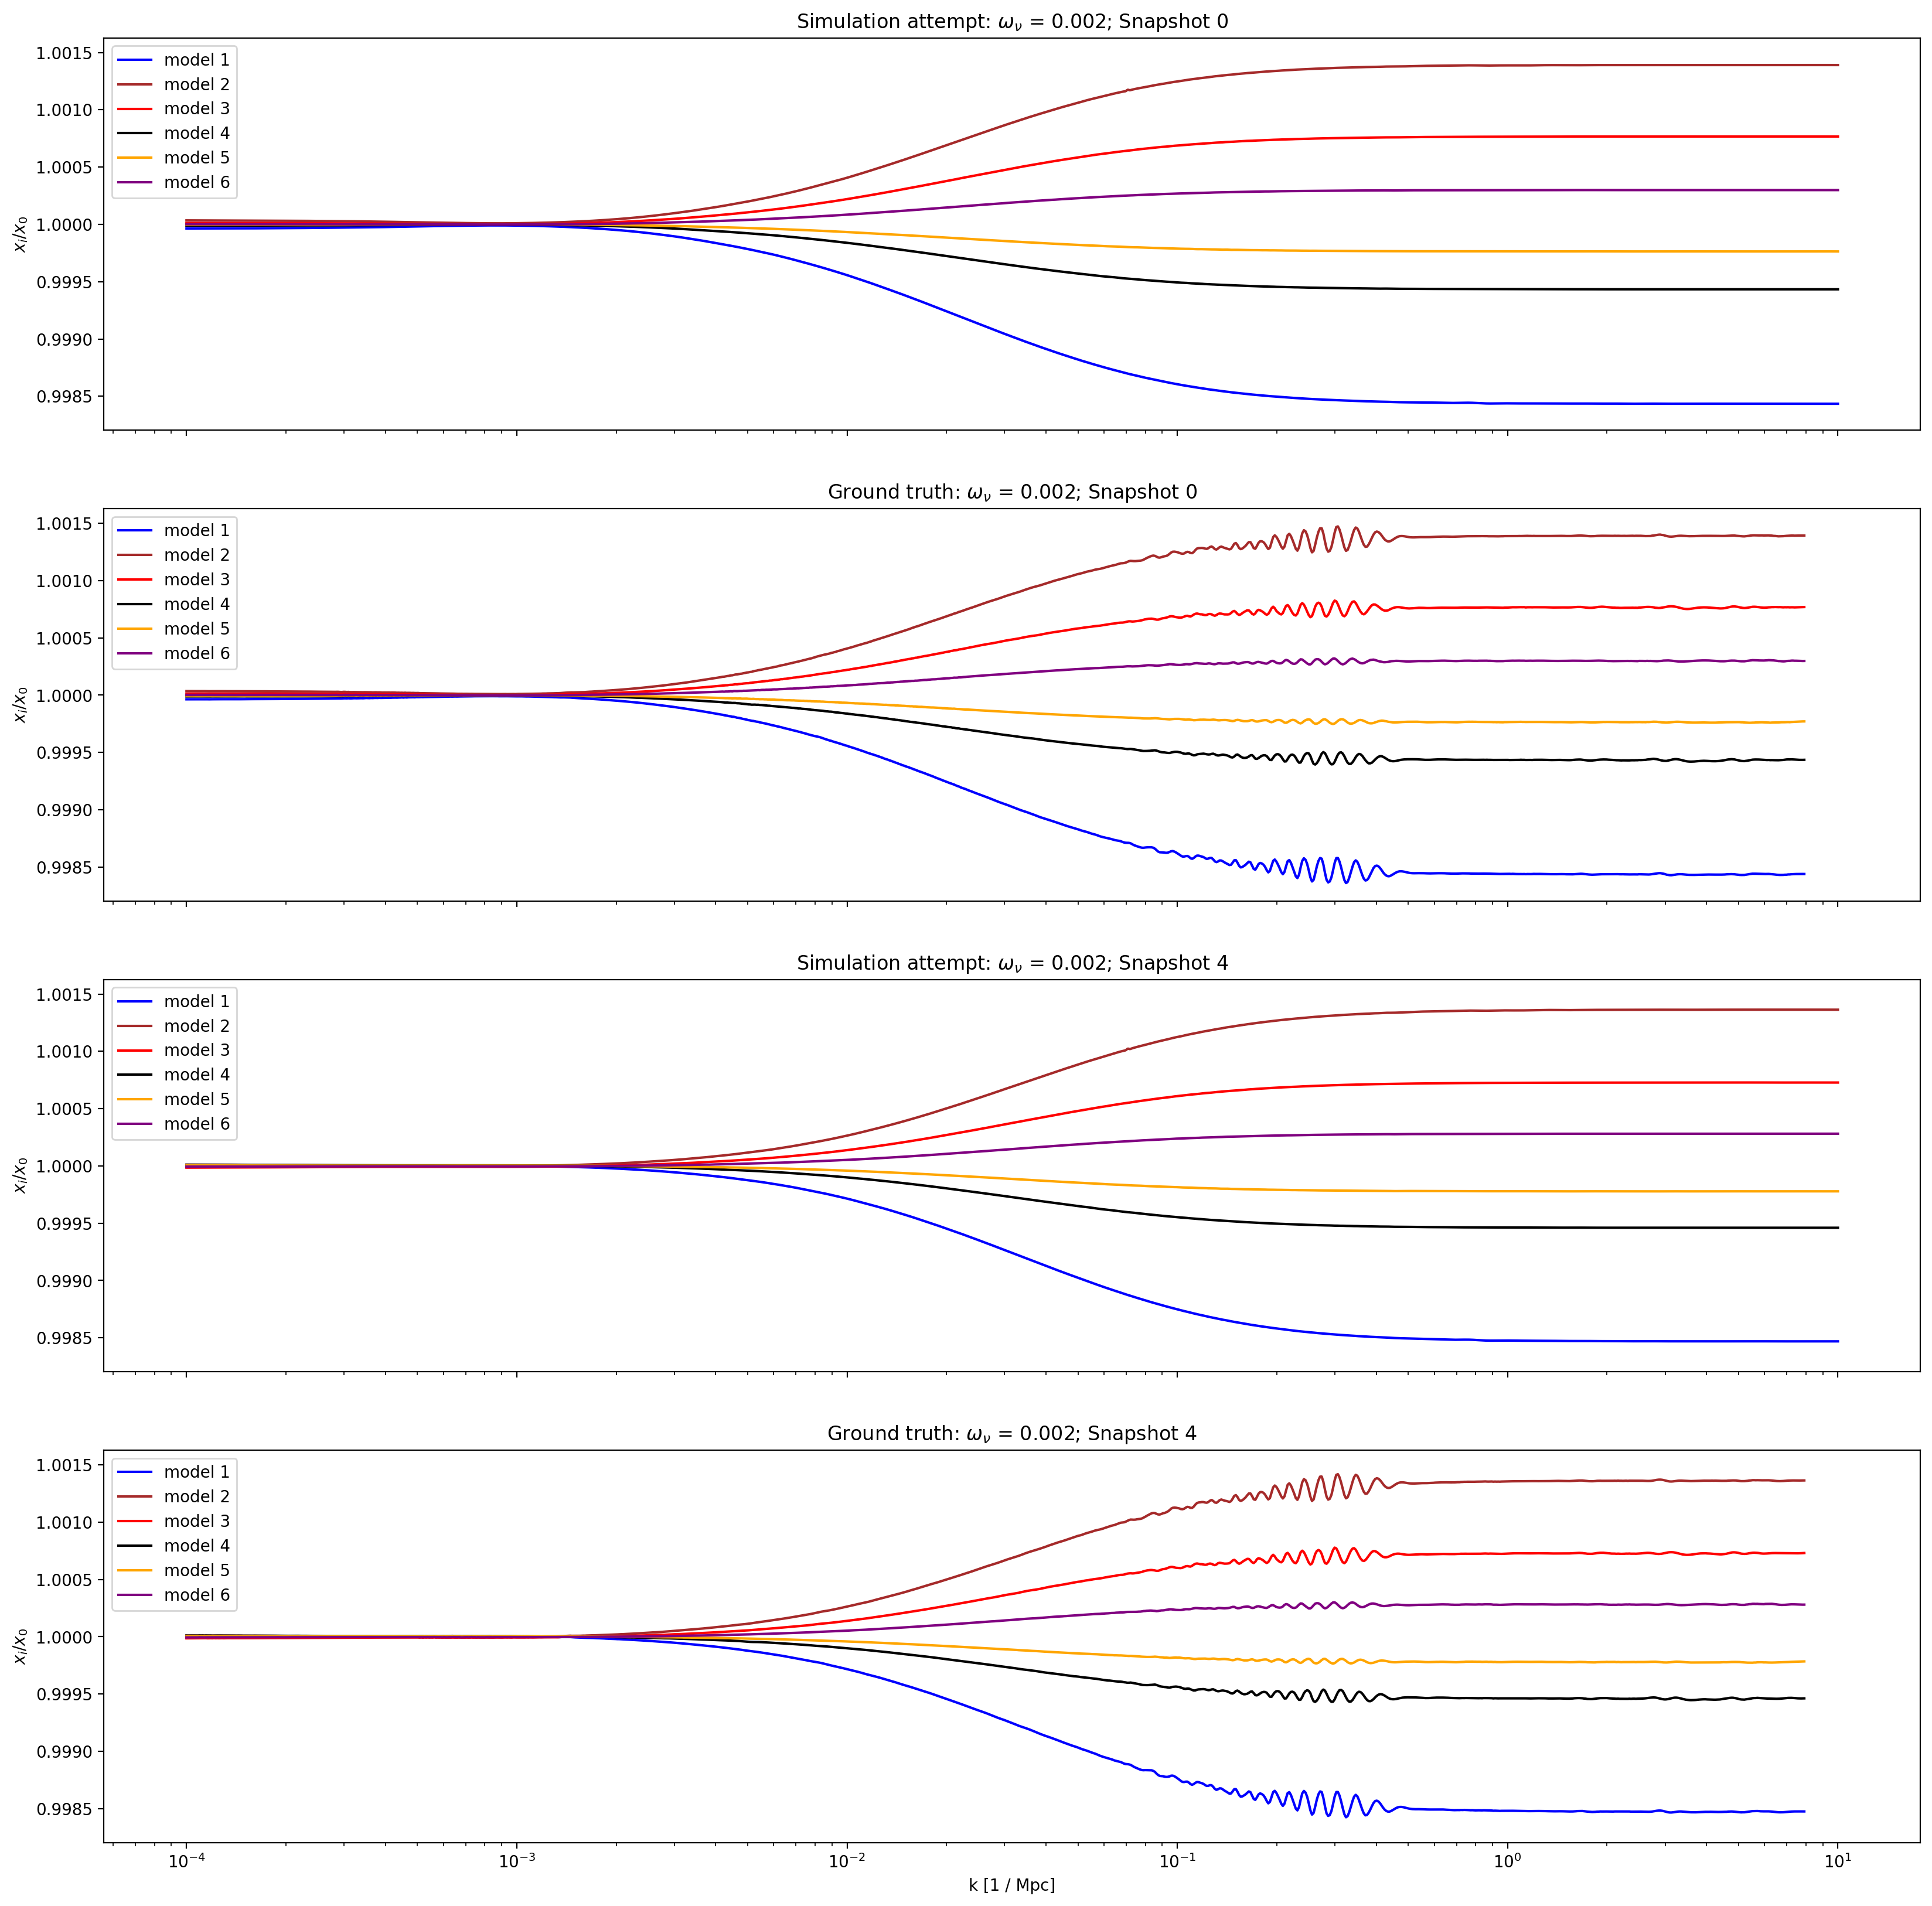

In [23]:
fig, axs = plt.subplots(4, 1, sharex="col", sharey="row")
spectra.model_ratios_old(
    k_massive_list, x_list, 0, axs, "",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 0", [7, 8], 0, ['y'], x_mode=True)
spectra.model_ratios_true(0, spectra.powernu3[onh2_str], axs, 'x', [7, 8], 1,
    ['y'])
spectra.model_ratios_old(
    k_massive_list, x_list, 4, axs, "",
    r"Simulation attempt: $\omega_\nu$ = " + onh2_str + "; " + \
    "Snapshot 4", [7, 8], 2, ['y'], x_mode=True)
spectra.model_ratios_true(4, spectra.powernu3[onh2_str], axs, 'x', [7, 8], 3,
    ['x', 'y'])

minmin = axs[0].get_ylim()[0]
maxmax = axs[0].get_ylim()[1]
for i in range(1, 4):
    ymin, ymax = axs[i].get_ylim()
    if ymin < minmin:
        minmin = ymin
    if ymax > maxmax:
        maxmax = ymax
        
for i in range(4):
    axs[i].set_ylim((minmin, maxmax))

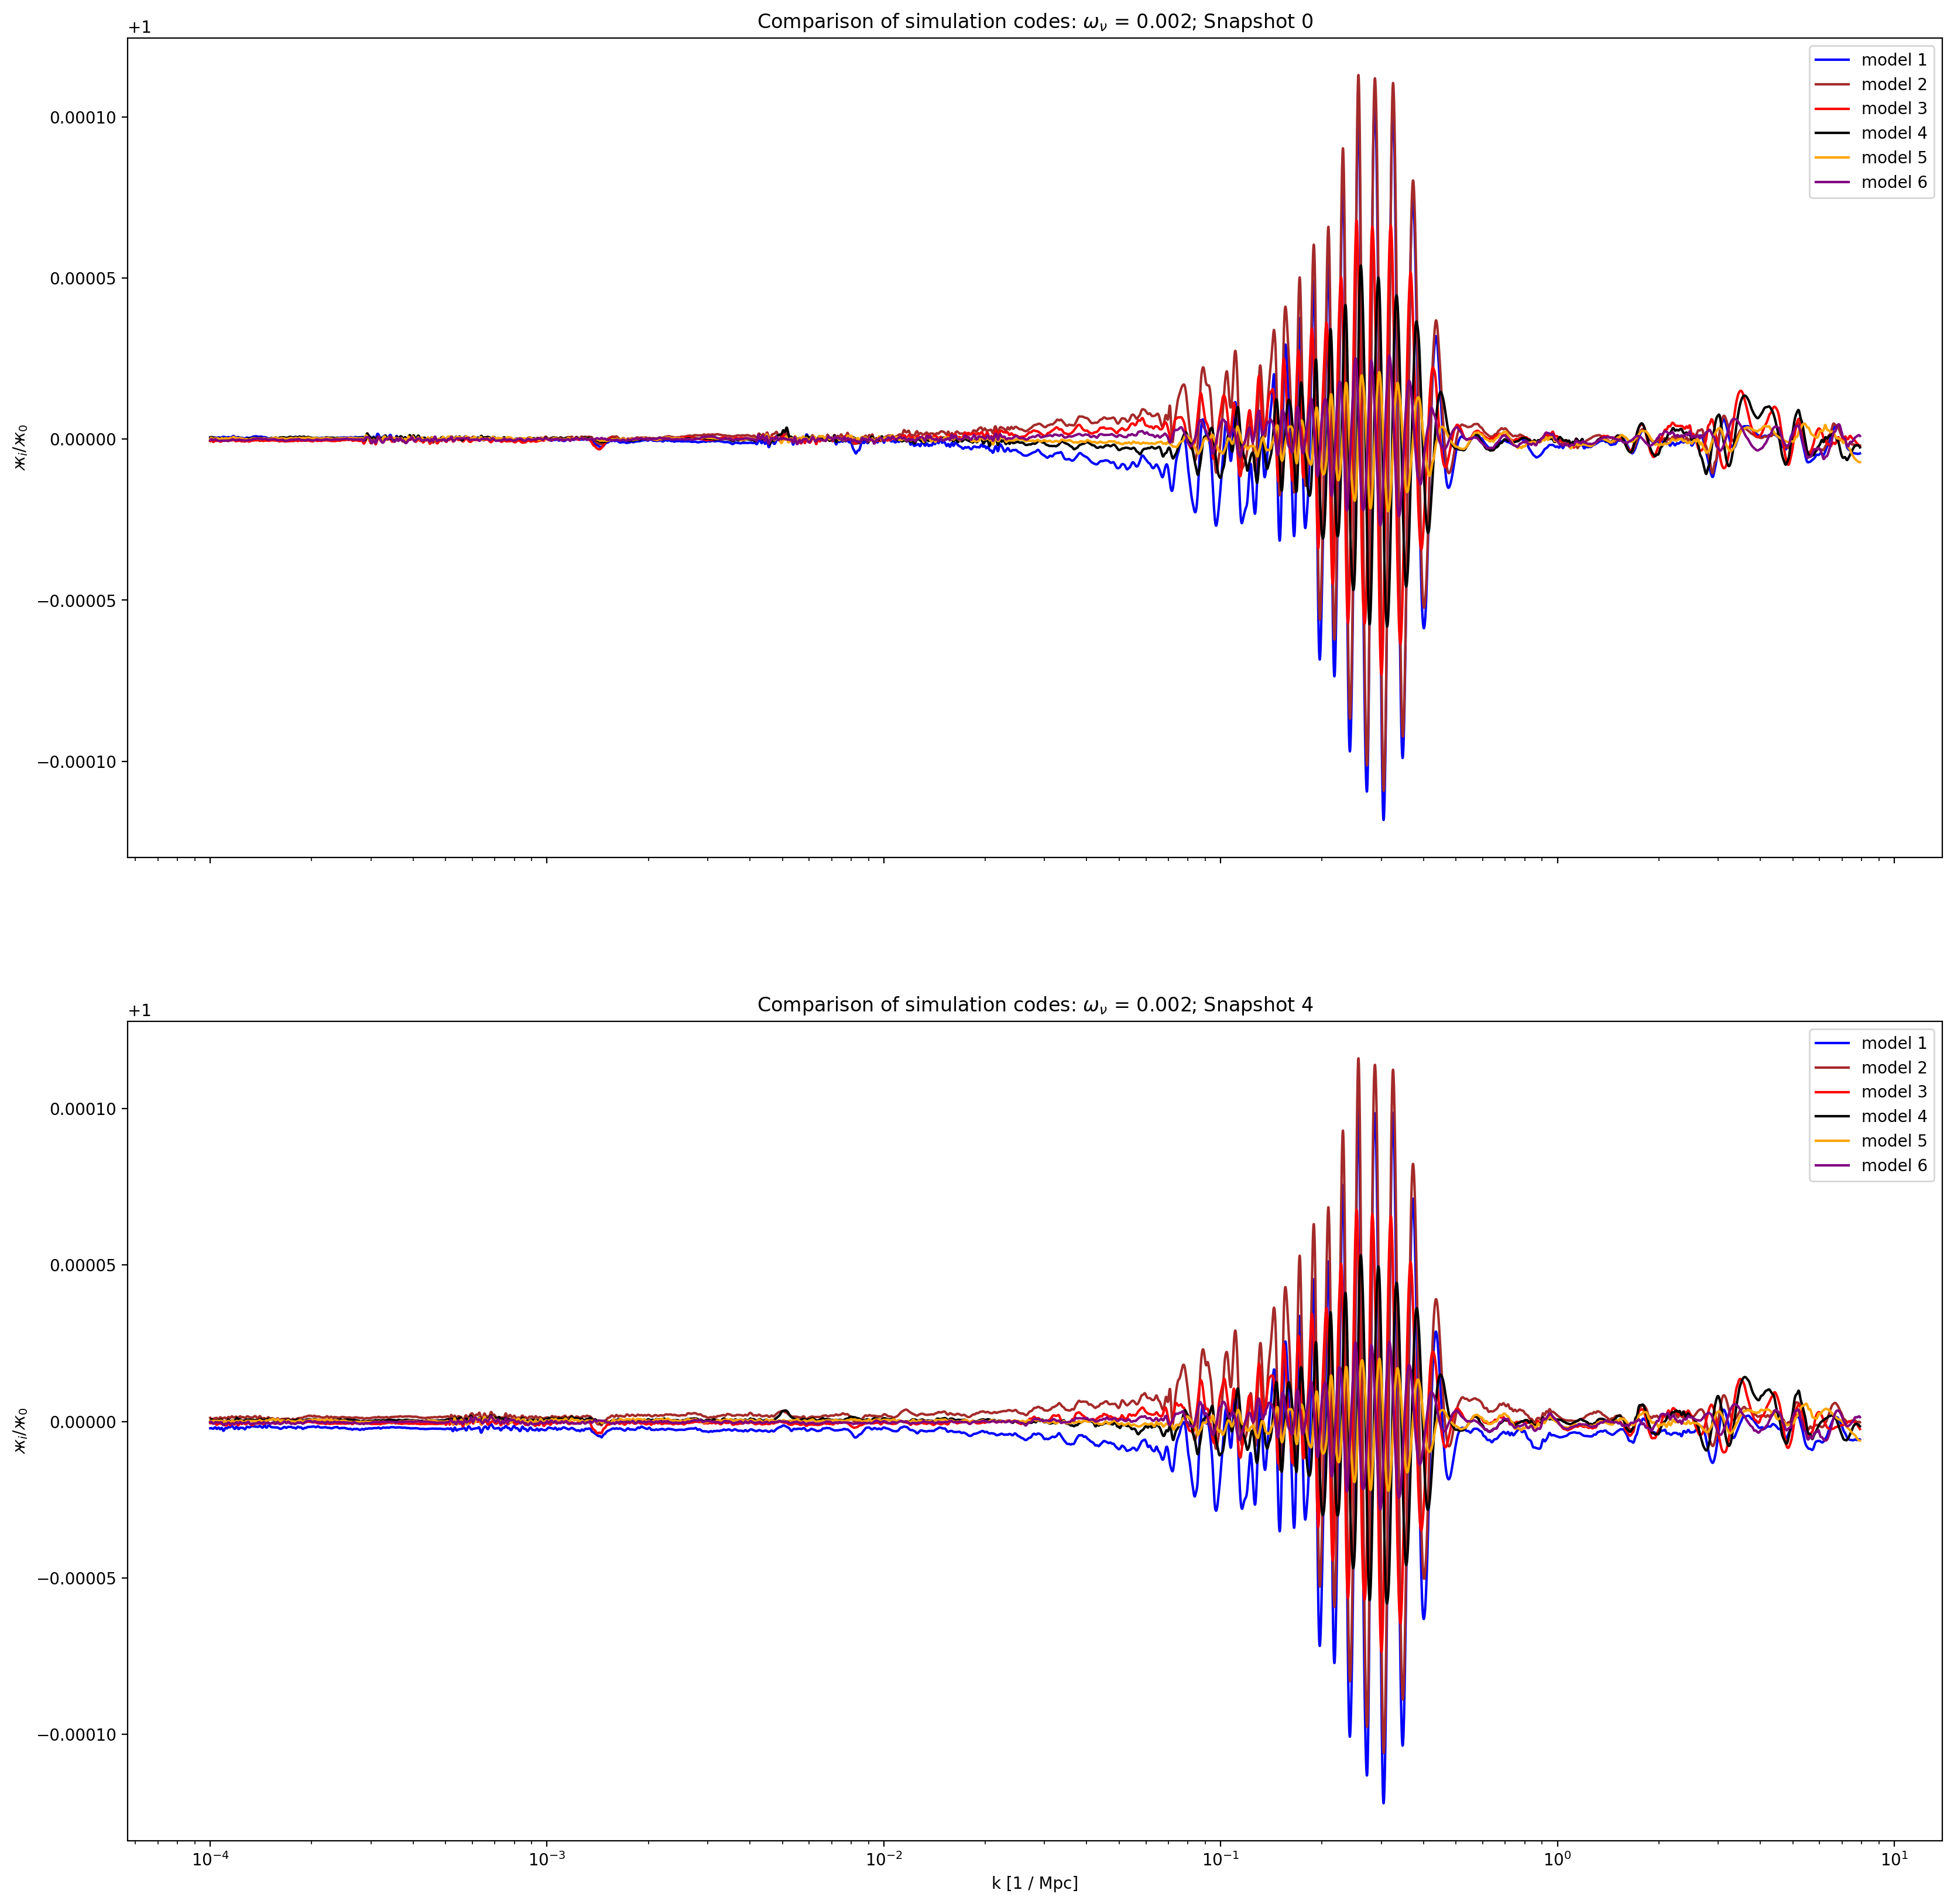

In [24]:
fig, axs = plt.subplots(2, 1, sharex="col", sharey="row")
spectra.compare_wrappers(k_massive_list, x_list, spectra.powernu2, 0, axs,
    'x', "",
    r"Comparison of simulation codes: $\omega_\nu$ = " + onh2_str + \
    "; Snapshot 0", [7, 8], 0, ['y'])
spectra.compare_wrappers(k_massive_list, x_list, spectra.powernu2, 4, axs,
    'x', "",
    r"Comparison of simulation codes: $\omega_\nu$ = " + onh2_str + \
    "; Snapshot 4", [7, 8], 1, ['x', 'y'])

## 